In [1]:
from Lens_candidate.lens_candidate import lens_candidate

difmap_path = '/usr/local/difmap/difmap'

## Initialize lens candidate object

In [2]:
# The lens_candidate object will include all relevant information. It uses an ImageData and Component class,
# that are used within and will save derived parameters as well.

# Let us initialize a lens candidate object for your favourite source
J2347 = lens_candidate(date_tolerance=7, z=0.22, difmap_path=difmap_path)
# We set date_tolerance to 7 days (default 1 day), meaning we treat datasets within one week as the same epoch.
# Similarly, we can set freq_tolerance, which is set to 1 GHz by default, which is good for our purposes.

## Read data

In [3]:
# Here we read the data using the read_all function. This assumes all files are present in the respective folder,
# and that the files (.fits, .uvfits, .mfit, .mfitid) follow the same naming convention for each individual
# observation.
# NOTE: on public GitHub repo, so far no example data are made available, so please use your own.

path = '/home/felix/Test_lens_candidate/Data/'

# J2347.read_all(path + 'J2347-1856_EVN_C/')
# J2347.read_all(path + 'J2347-1856_Astrogeo/')
# J2347.read_all(path + 'J2347-1856_BL192W_C/')
# J2347.read_all(path + 'J2347-1856_BL192W_X')

# Alternatively, we can also read the data by specifying each file individually.
# There one can also set some more parameters.

# J2347 = lens_candidate(date_tolerance=7, z=0.22, difmap_path=difmap_path)
J2347.add_image_dataset(
    fits_file=path + 'J2347-1856_EVN_C/J2347-1856_C_2021_03_04.fits',
    uvf_file=path + 'J2347-1856_EVN_C/J2347-1856_C_2021_03_04.uvf',
    mfit_file=path + 'J2347-1856_EVN_C/J2347-1856_C_2021_03_04.mfit',
    mfitid_file=path + 'J2347-1856_EVN_C/J2347-1856_C_2021_03_04.mfitid',
    shift=[0,0],    # can specify shift if fits file was shifted within difmap
    difmap_weight=[0,-1]    # default is [0,-1], should be chosen the same as generated for the fits file for consistency
    )
J2347.read_all(path + 'J2347-1856_Astrogeo/')
J2347.read_all(path + 'J2347-1856_BL192W_C/')
J2347.read_all(path + 'J2347-1856_BL192W_X')
# This automatically calculates component errors, for example.

### ADDING IMAGE DATASET ###
# Determining component SNR for comp A #
Running difmap using .fits and .uvf file
Shifted map by [0,0] pixels.
Peak flux densitiy after component subtraction [Jy/beam]:
0.165548
RMS value measured around component position in residual map [Jy/beam]:
0.0040896125
# Determining component SNR for comp B #
Running difmap using .fits and .uvf file
Shifted map by [0,0] pixels.
Peak flux densitiy after component subtraction [Jy/beam]:
0.158994
RMS value measured around component position in residual map [Jy/beam]:
0.0035013368
Added image_dataset
### READING DATA ###
# Reading fits files: #
['/home/felix/Test_lens_candidate/Data/J2347-1856_Astrogeo/J2347-1856_S_1997_07_02_yyk_map.fits'
 '/home/felix/Test_lens_candidate/Data/J2347-1856_Astrogeo/J2347-1856_S_1997_08_27_yyk_map.fits'
 '/home/felix/Test_lens_candidate/Data/J2347-1856_Astrogeo/J2347-1856_S_2014_06_09_pus_map.fits'
 '/home/felix/Test_lens_candidate/Data/J2347-1856_Astrogeo/J2347-1856_S_2017_05_01_pet_ma

Shifted map by [0,0] pixels.


/home/felix/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/felix/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/felix/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Peak flux densitiy after component subtraction [Jy/beam]:
0.0620762
RMS value measured around component position in residual map [Jy/beam]:
nan
# Determining component SNR for comp C #
Running difmap using .fits and .uvf file
Shifted map by [0,0] pixels.
Peak flux densitiy after component subtraction [Jy/beam]:
0.0617258
RMS value measured around component position in residual map [Jy/beam]:
nan
Component C is unresolved
Calculated observed brightness temperature is a lower limit
# Determining component SNR for comp A #
Running difmap using .fits and .uvf file
Shifted map by [0,0] pixels.
Peak flux densitiy after component subtraction [Jy/beam]:
0.100279
RMS value measured around component position in residual map [Jy/beam]:
0.0030331693
# Determining component SNR for comp B #
Running difmap using .fits and .uvf file
Shifted map by [0,0] pixels.
Peak flux densitiy after component subtraction [Jy/beam]:
0.0927092
RMS value measured around component position in residual map [Jy/beam]:
0

## Calculate lens parameters

In [4]:
# Calculating lens parameters is done with a very simple function call.
J2347.calc_all()
# set outfile_path="/whatever_path/" to save it to a different folder. The file is named automatically, please
# only provide the folder path.

# This creates a pandas dataframe within the lens candidate class that we can print:
print(J2347.df)
# And checking the columns
print(J2347.df.columns)
# We can then also look at specific columns
print('Component B flux densities:')
for i in range(len(J2347.df['Flux B [Jy]'])):
    print(f'Epoch {J2347.df["Epoch"][i]:s} and Freq. {J2347.df["Freq [Hz]"][i]/1E9:.1f}: S_nu={J2347.df["Flux B [Jy]"][i]:.2f}' + '+/-' + f'{J2347.df["Flux B err [Jy]"][i]:.2f}')

# We can see that all relevant parameters have been calculated with uncertainties.
# This creates a folder with the source name that contains a csv file created from the df.
# For each combination of epoch and frequency, there is also a folder created with a csv file.

### CALCULATE SBR, FR AND SEPARATION ###
Surface brightness of region A: 1.138e+05 +/- 1.142e+04 Jy/arcsec^2
Surface brightness of region B: 1.951e+05 +/- 2.019e+04 Jy/arcsec^2
Surface brightness ratio: 0.58 +/- 0.08
Flux ratio: 1.14 +/- 0.09
Distance between components: 33.78 +/- 0.17 mas
Saved results to J2347-1856_2021-03-04_4.9GHz/lens_params.csv
### CALCULATE SBR, FR AND SEPARATION ###
Surface brightness of region A: 1.264e+05 +/- 1.551e+04 Jy/arcsec^2
Surface brightness of region B: 2.961e+05 +/- 4.261e+04 Jy/arcsec^2
Surface brightness ratio: 0.43 +/- 0.08
Flux ratio: 1.48 +/- 0.16
Distance between components: 33.31 +/- 0.44 mas


### CALCULATE SPECTRAL INDICES ###
Saved results to J2347-1856_1997-07-02_2.3GHz/lens_params.csv
### CALCULATE SBR, FR AND SEPARATION ###
Surface brightness of region A: 1.328e+05 +/- 4.649e+04 Jy/arcsec^2
Surface brightness of region B: 7.536e+04 +/- 3.176e+04 Jy/arcsec^2
Surface brightness ratio: 1.76 +/- 0.97
Flux ratio: 1.25 +/- 0.34
Distance betwe

## Plot images and results

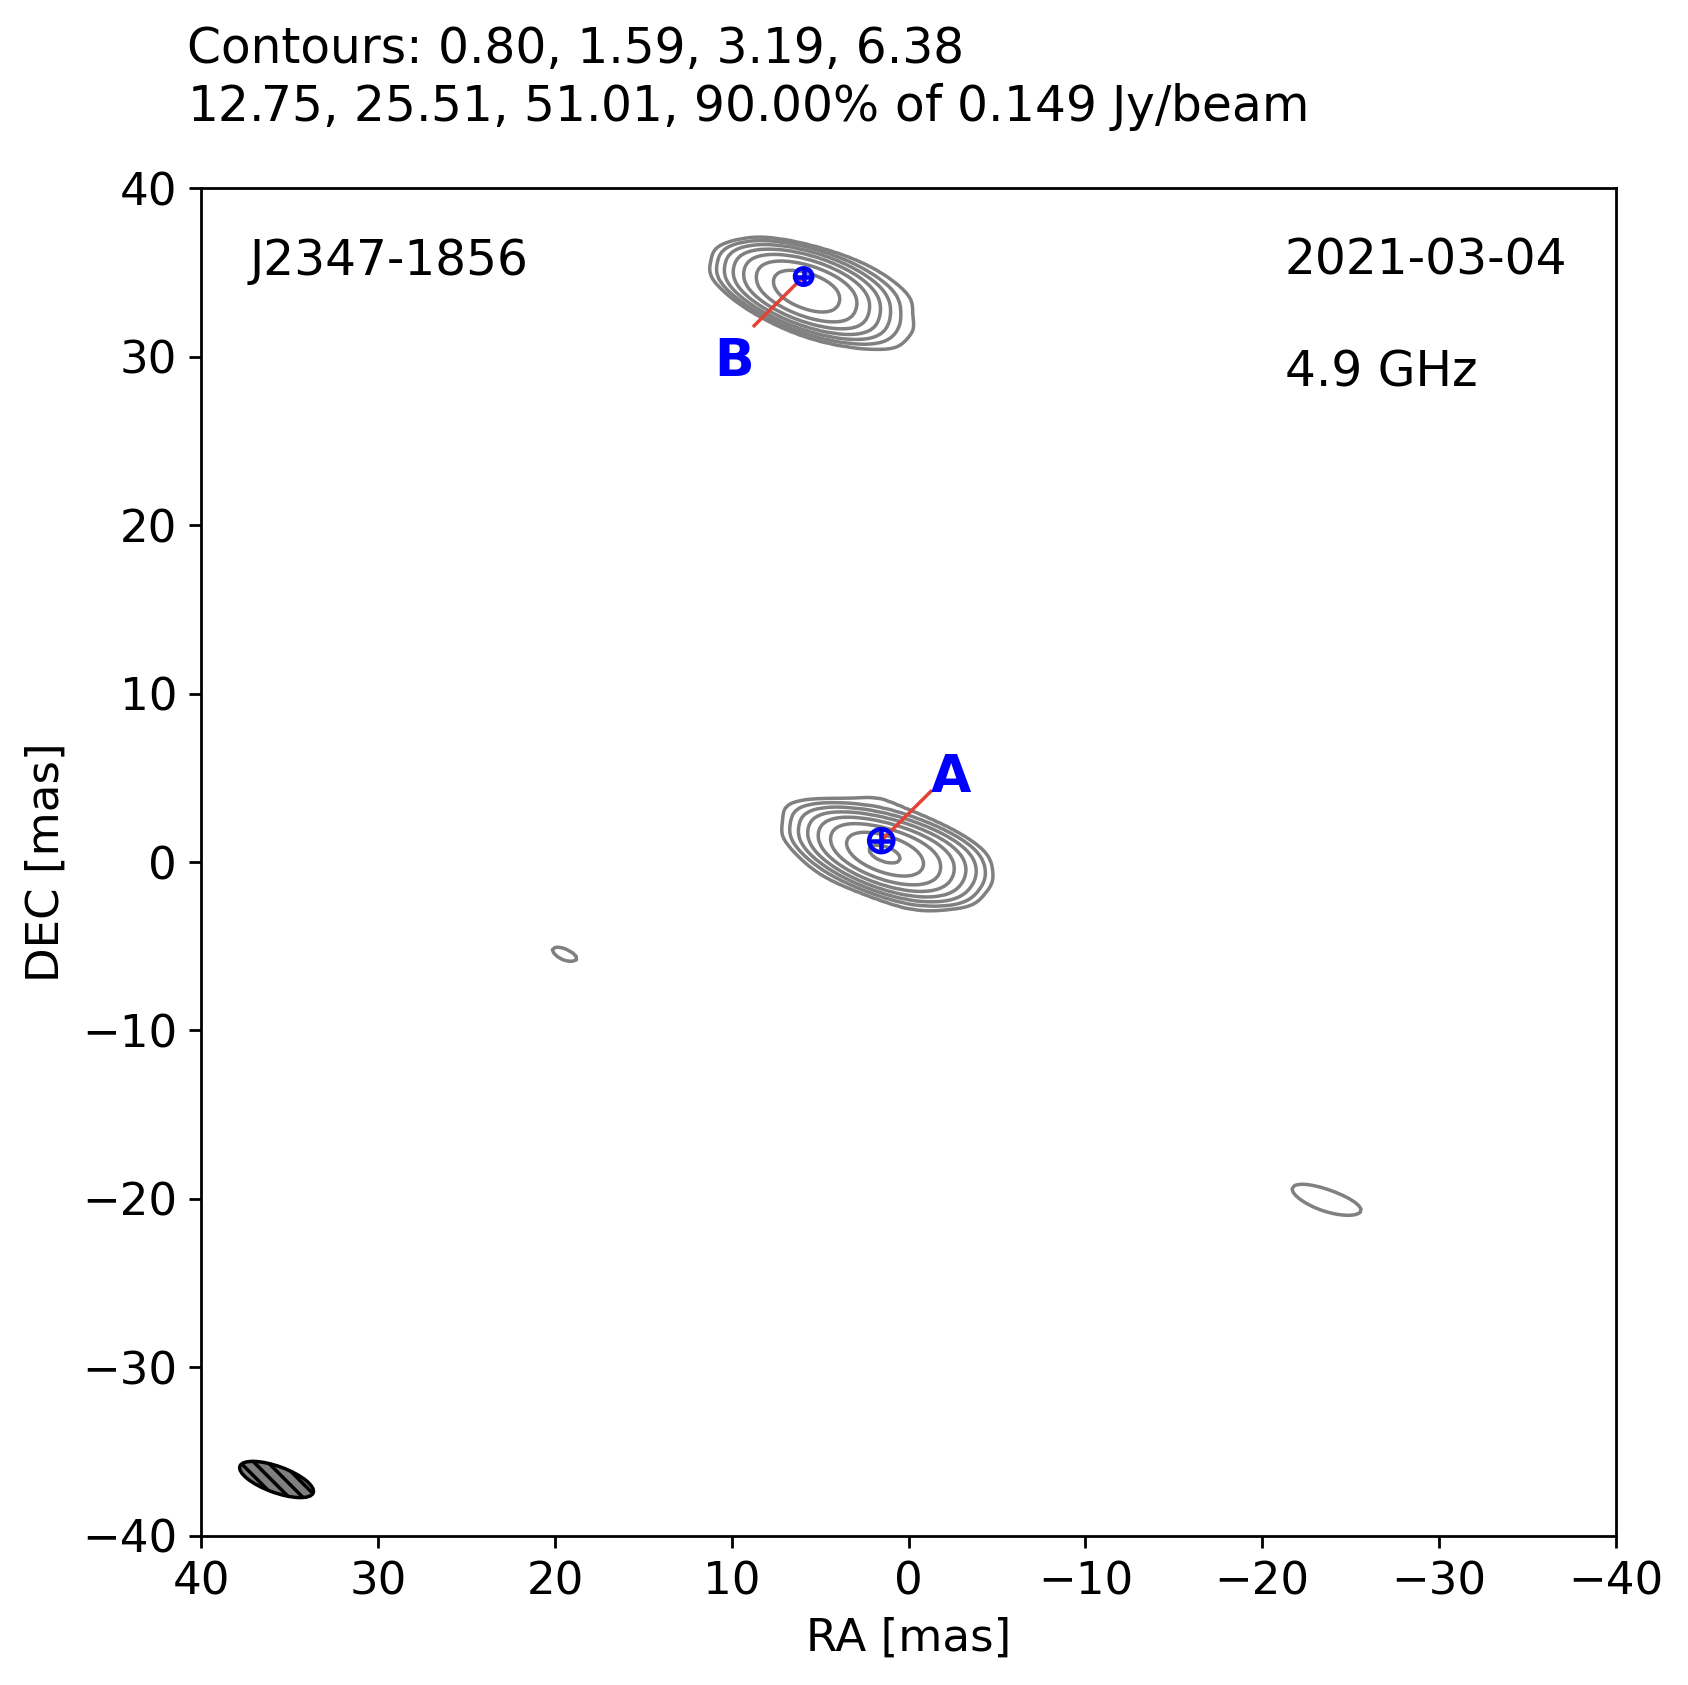

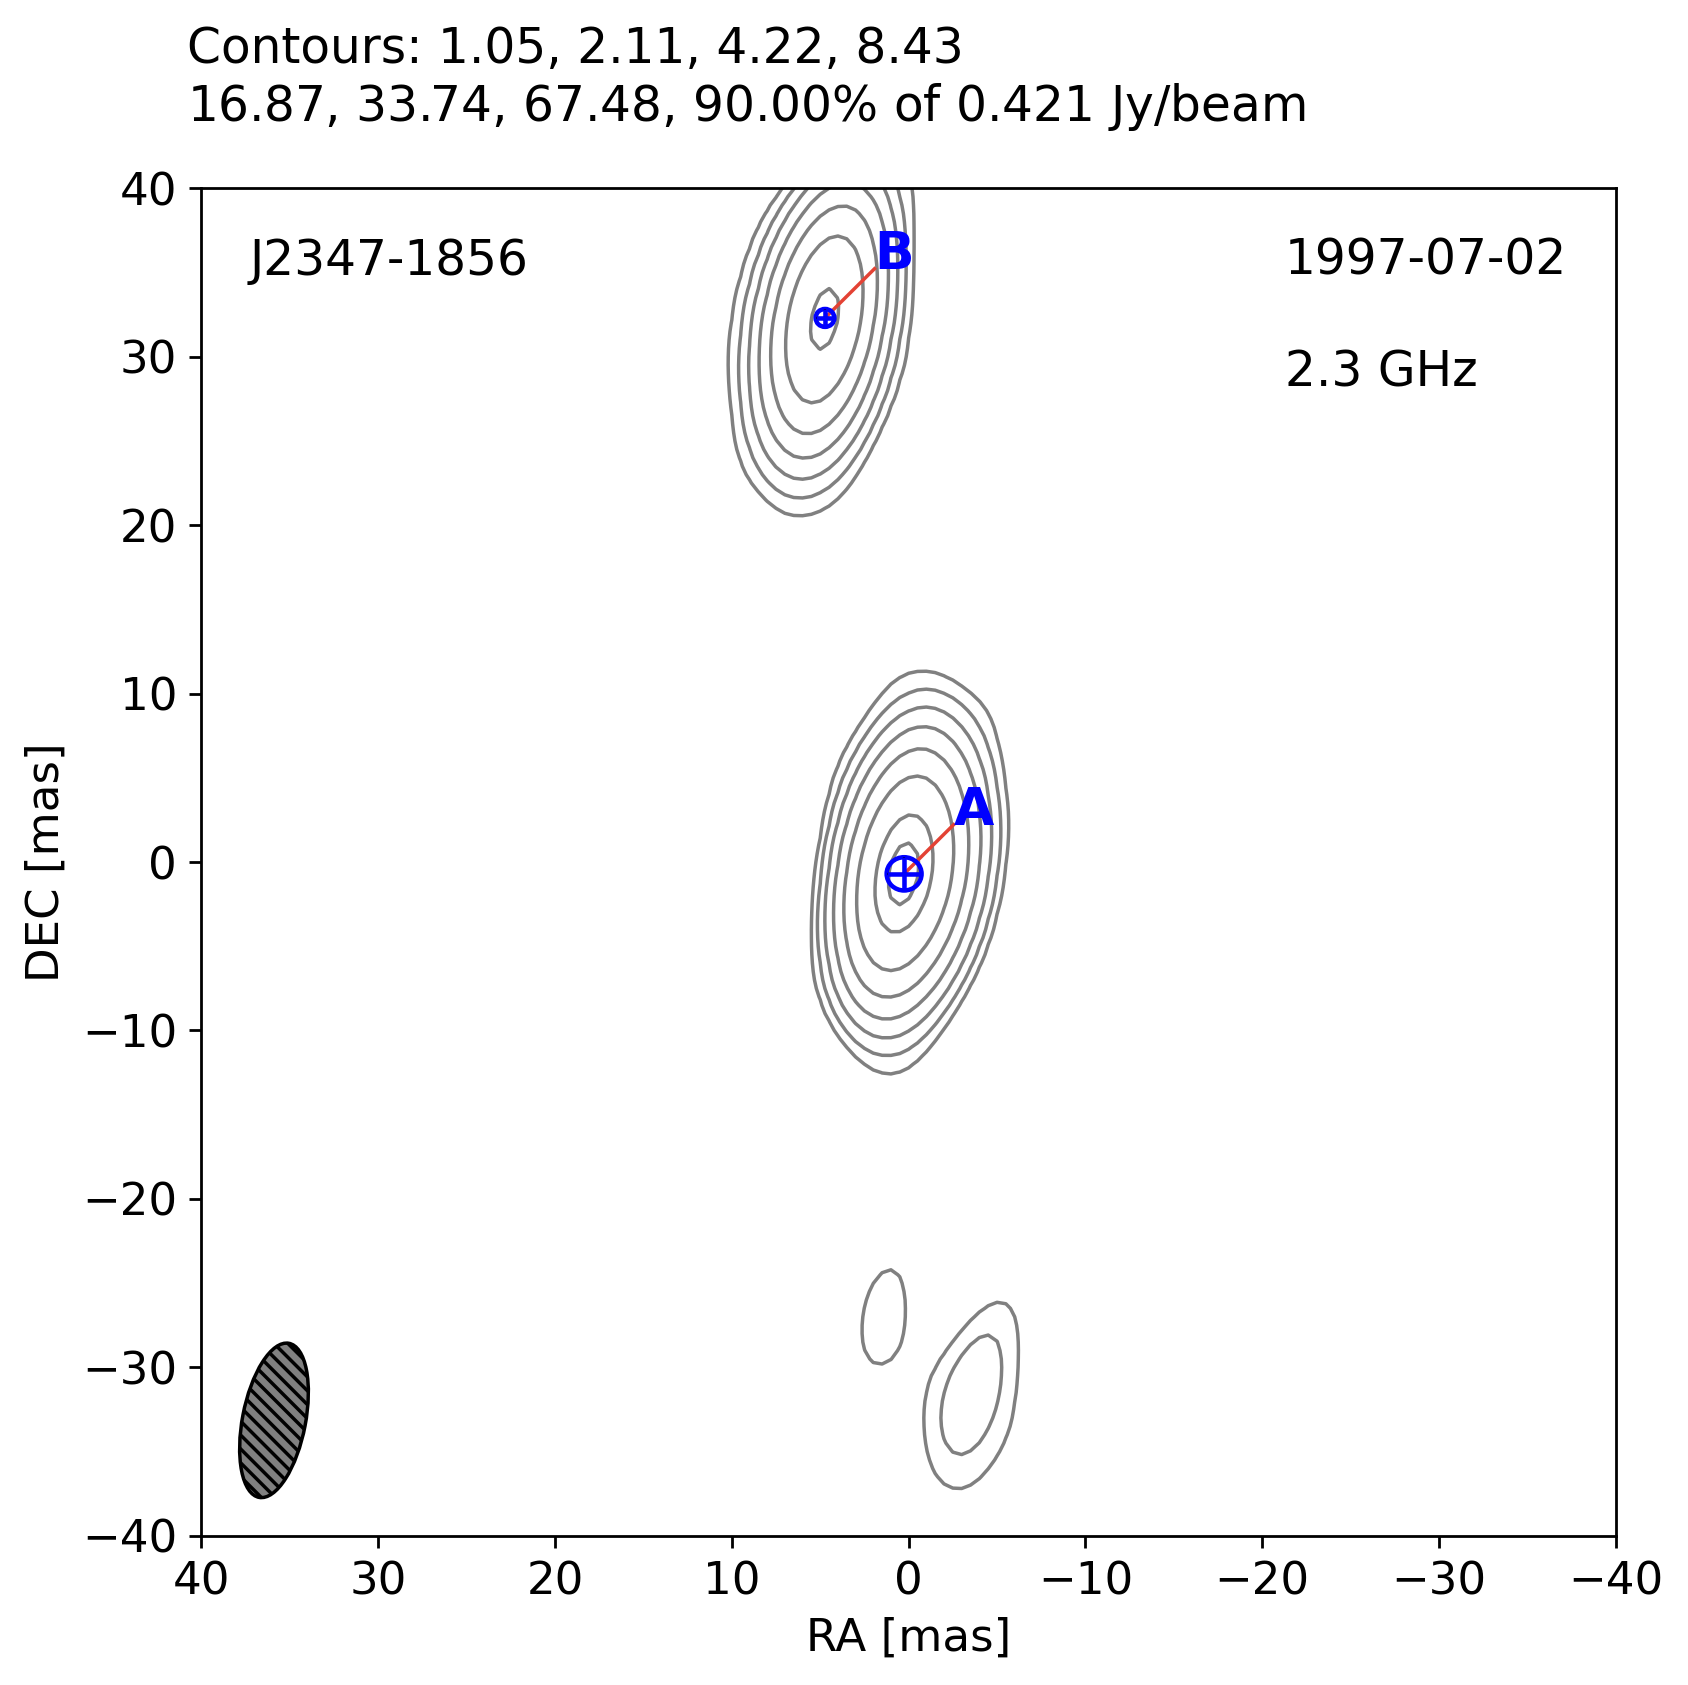

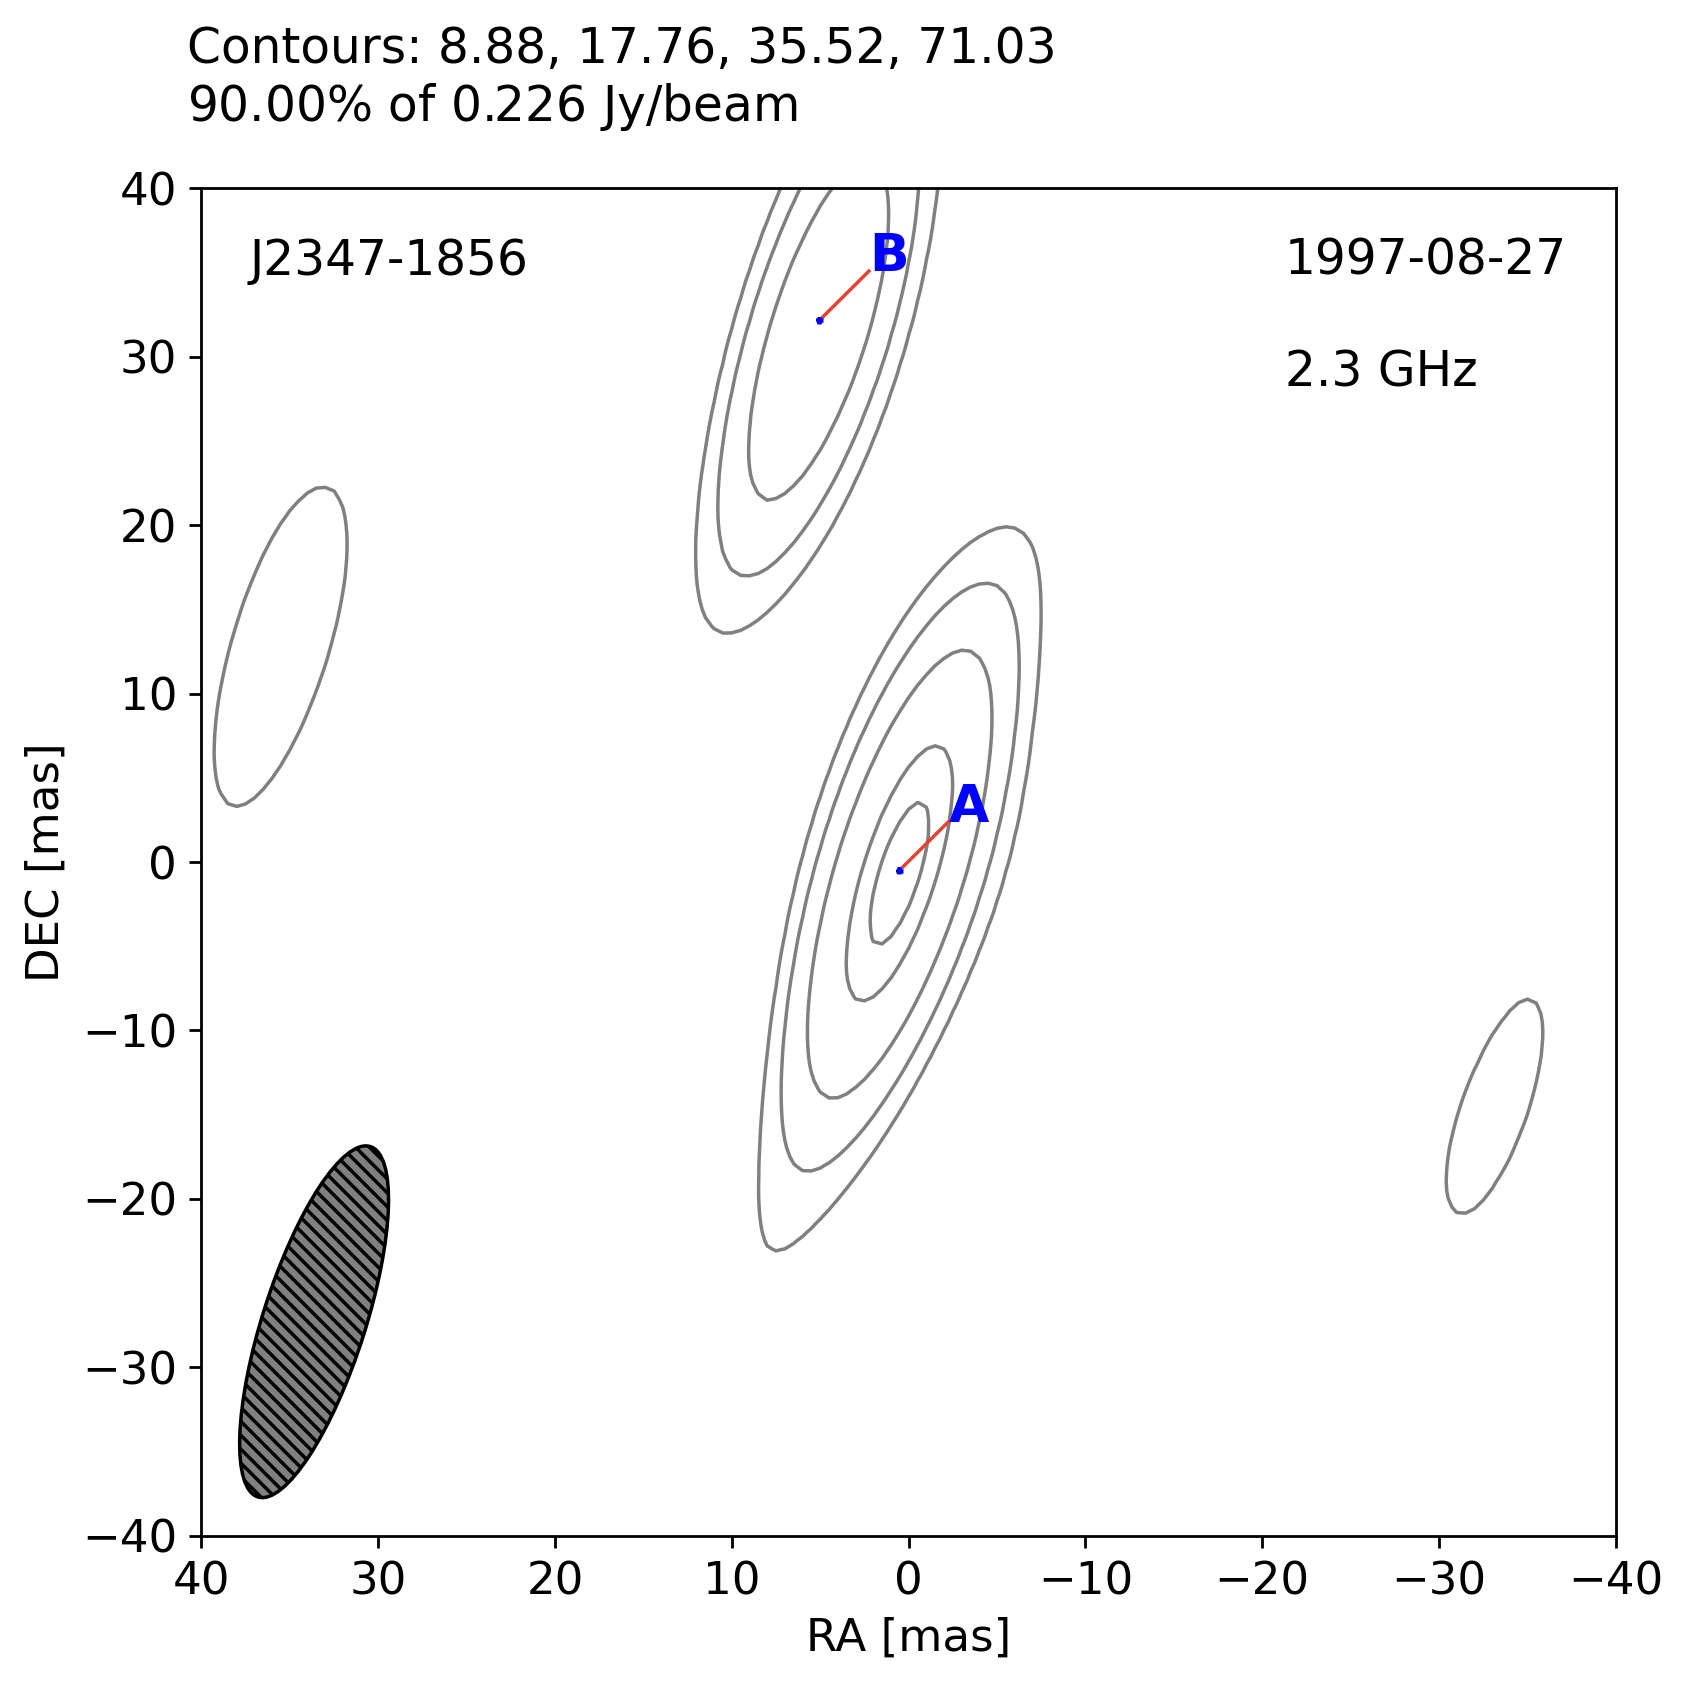

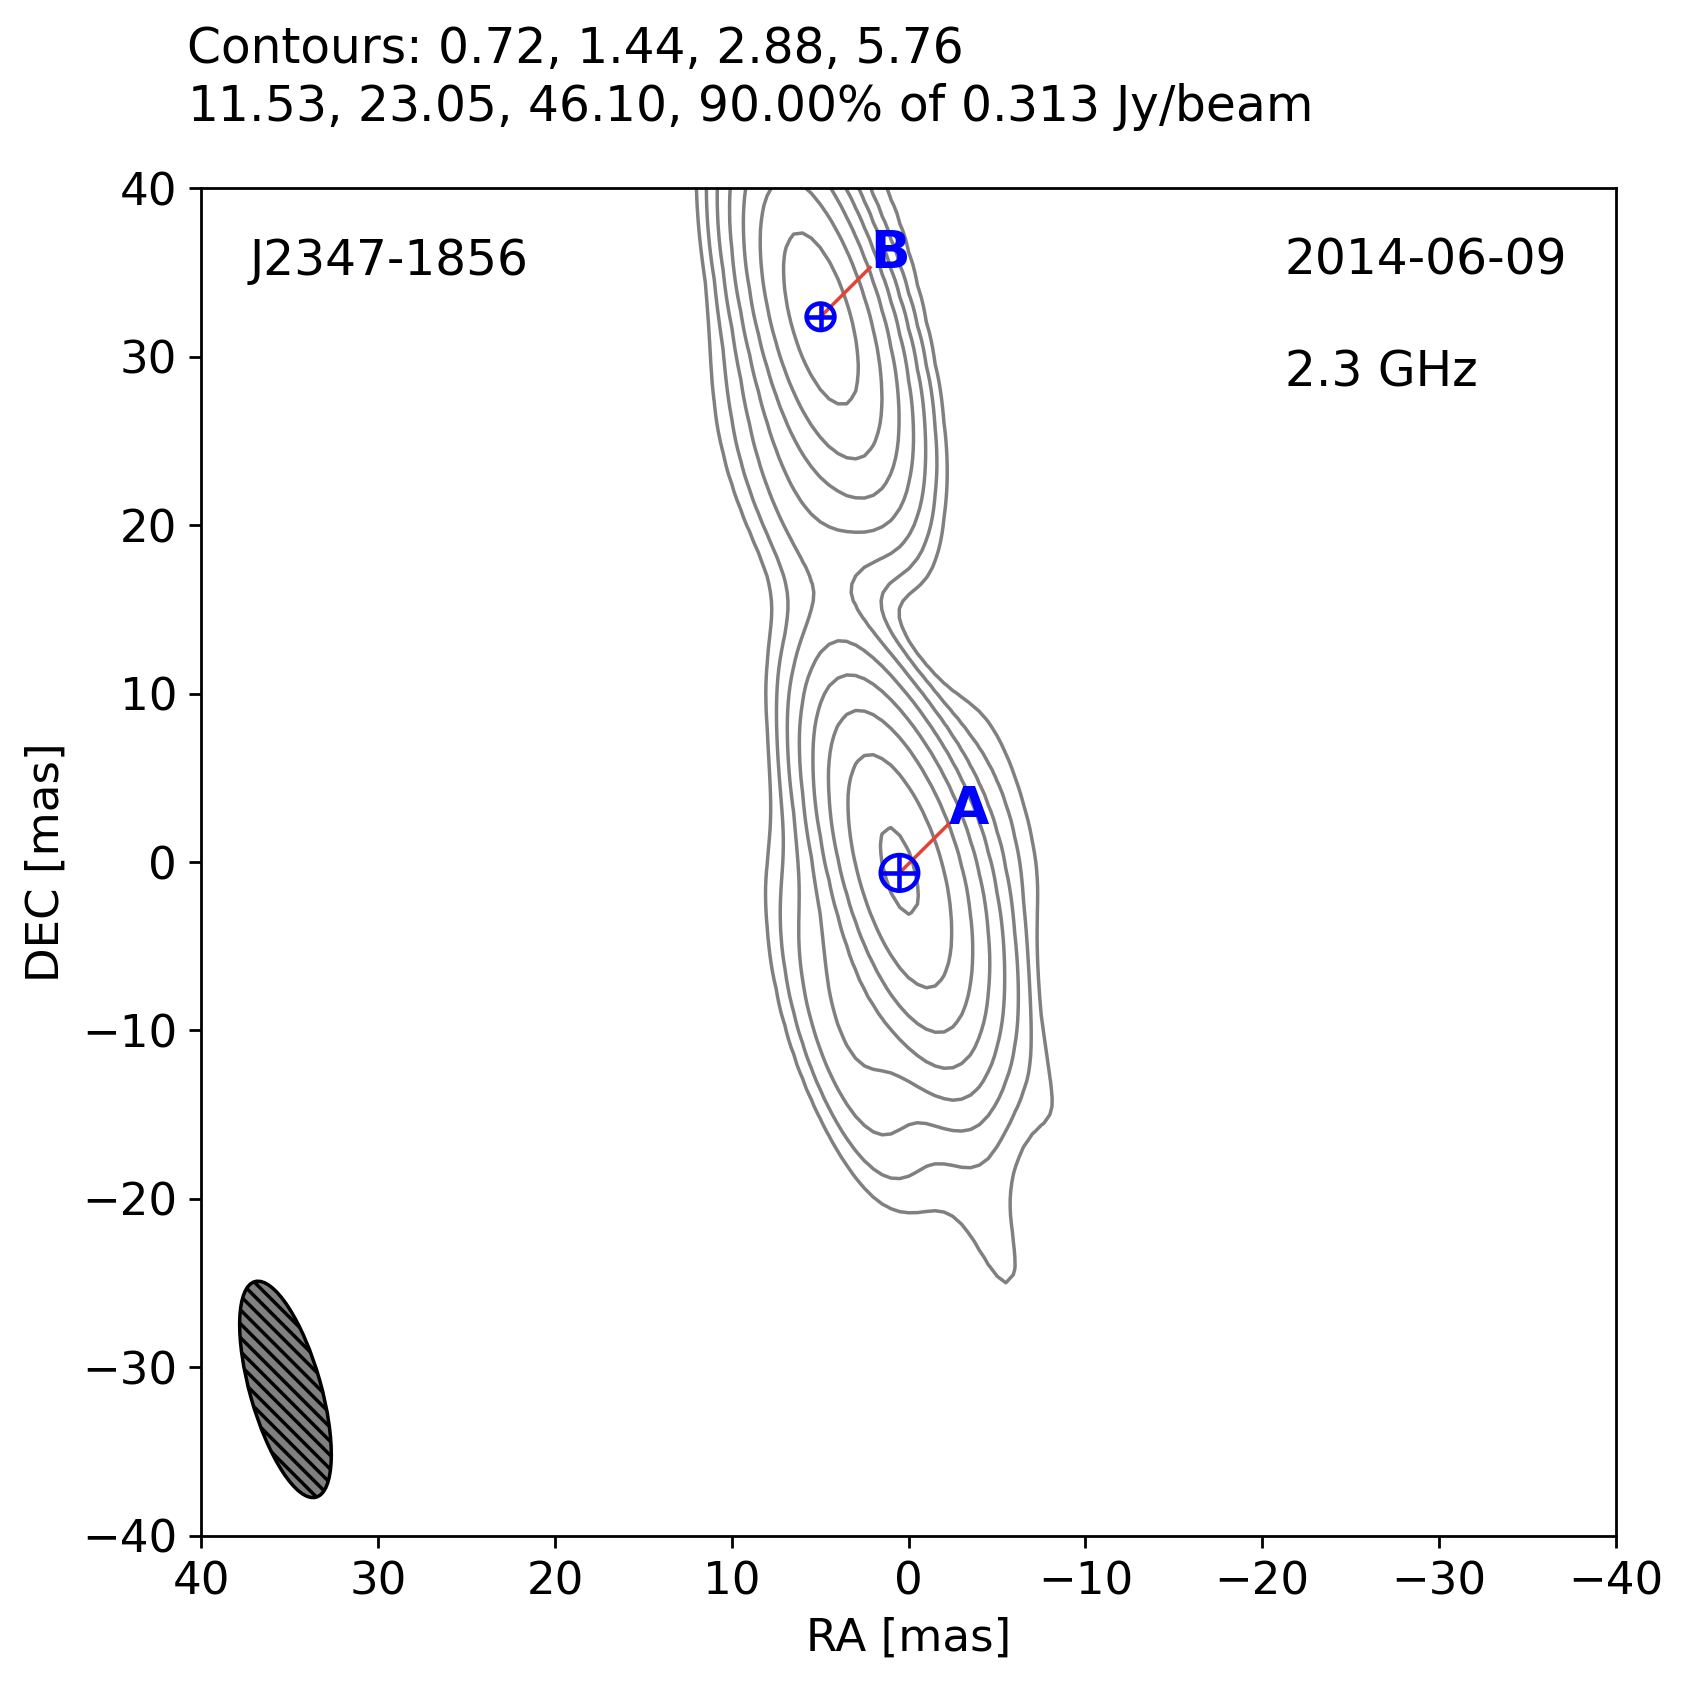

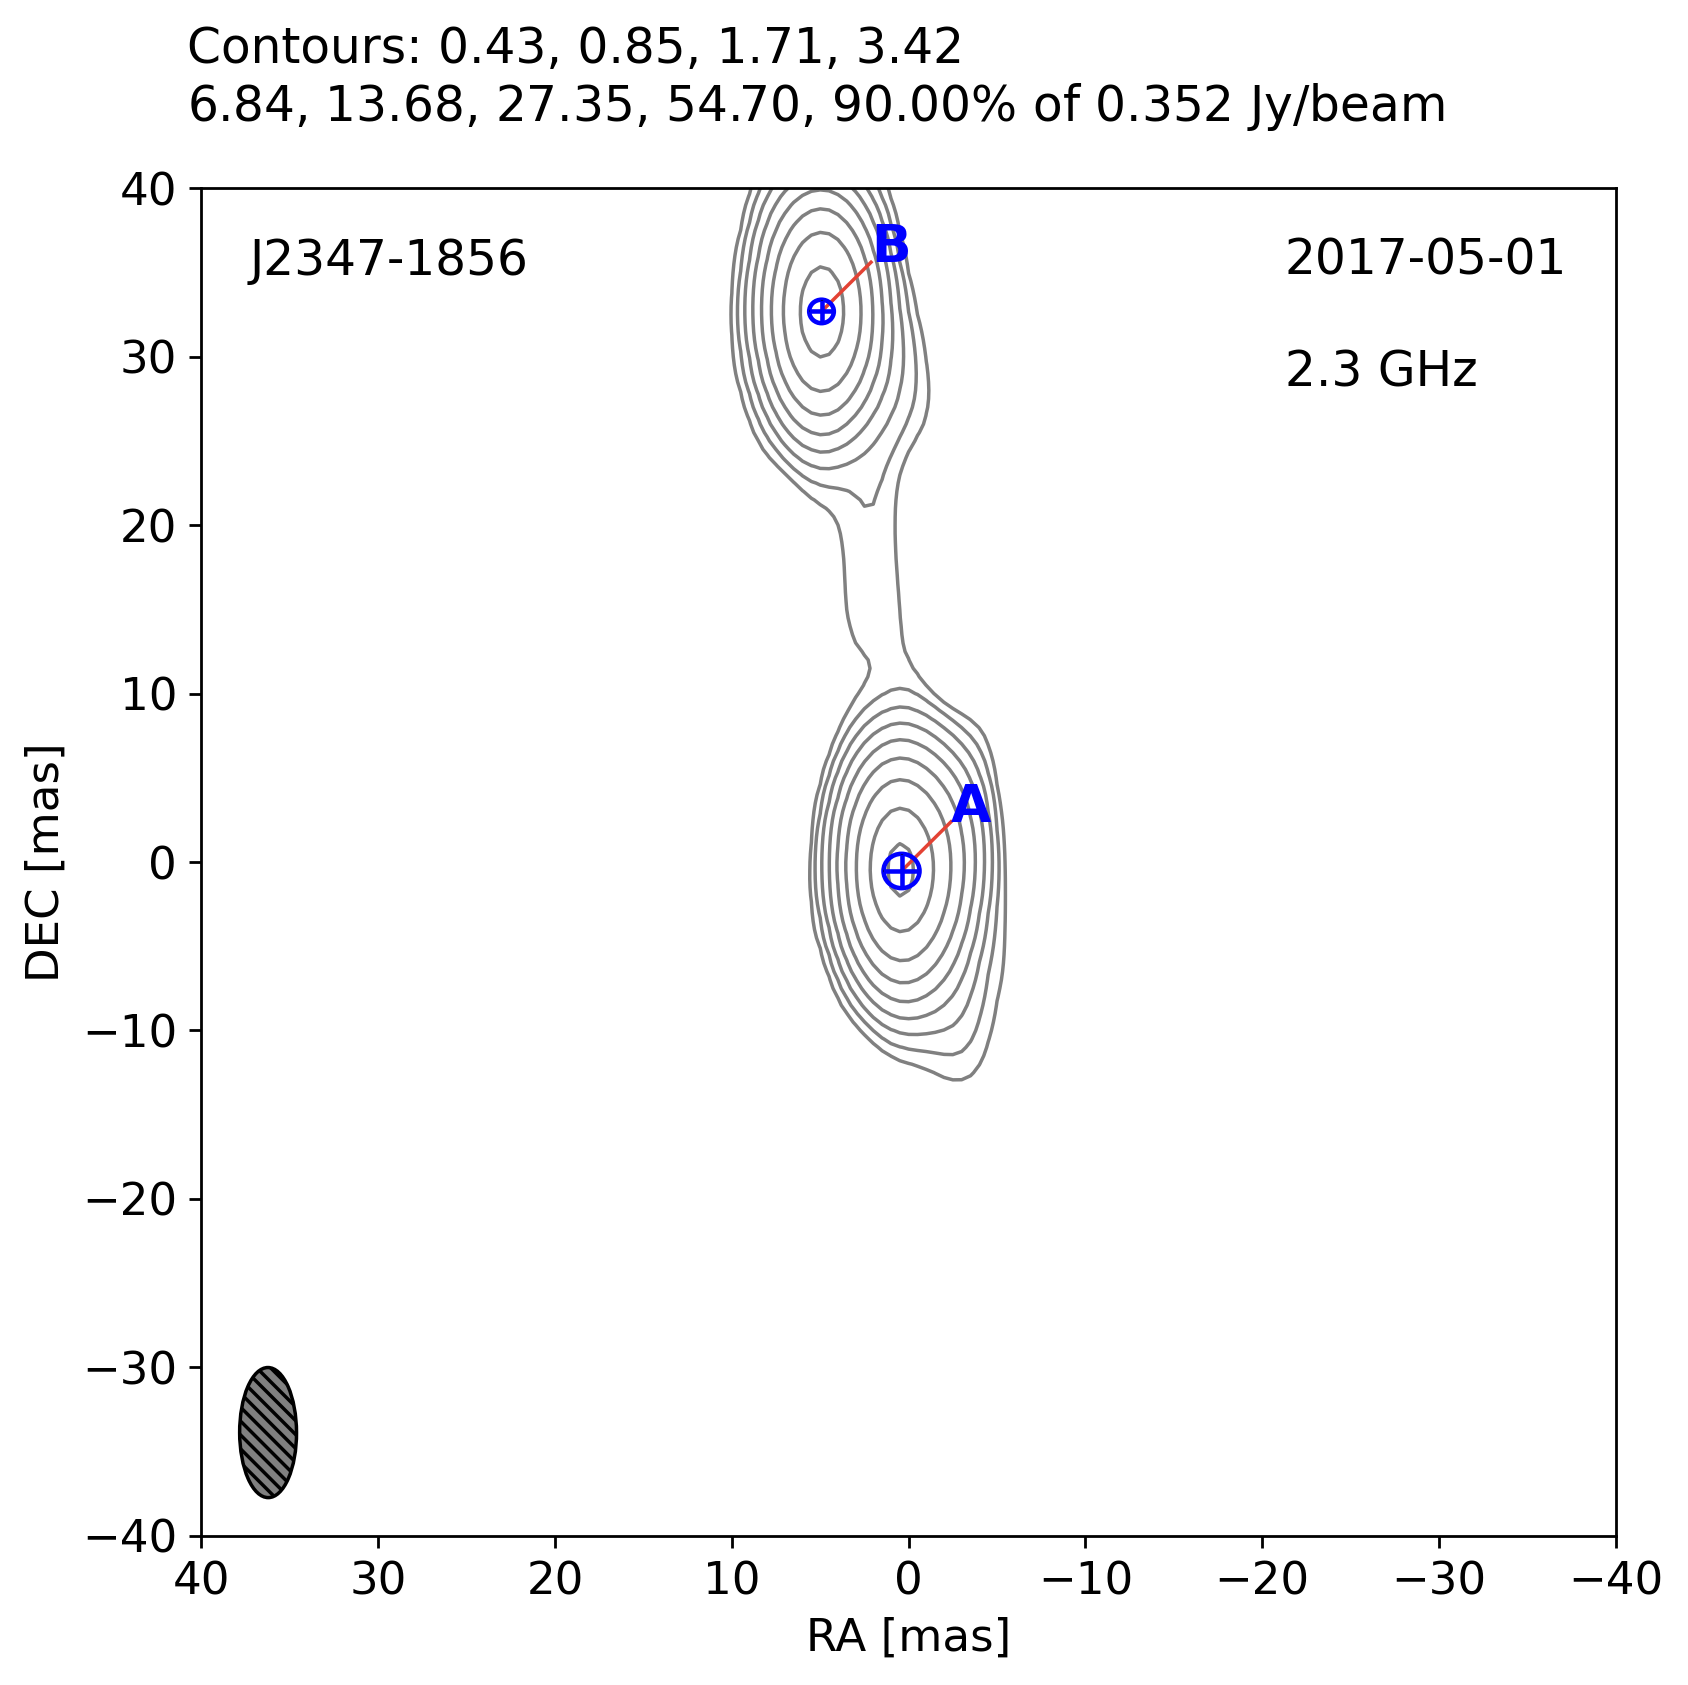

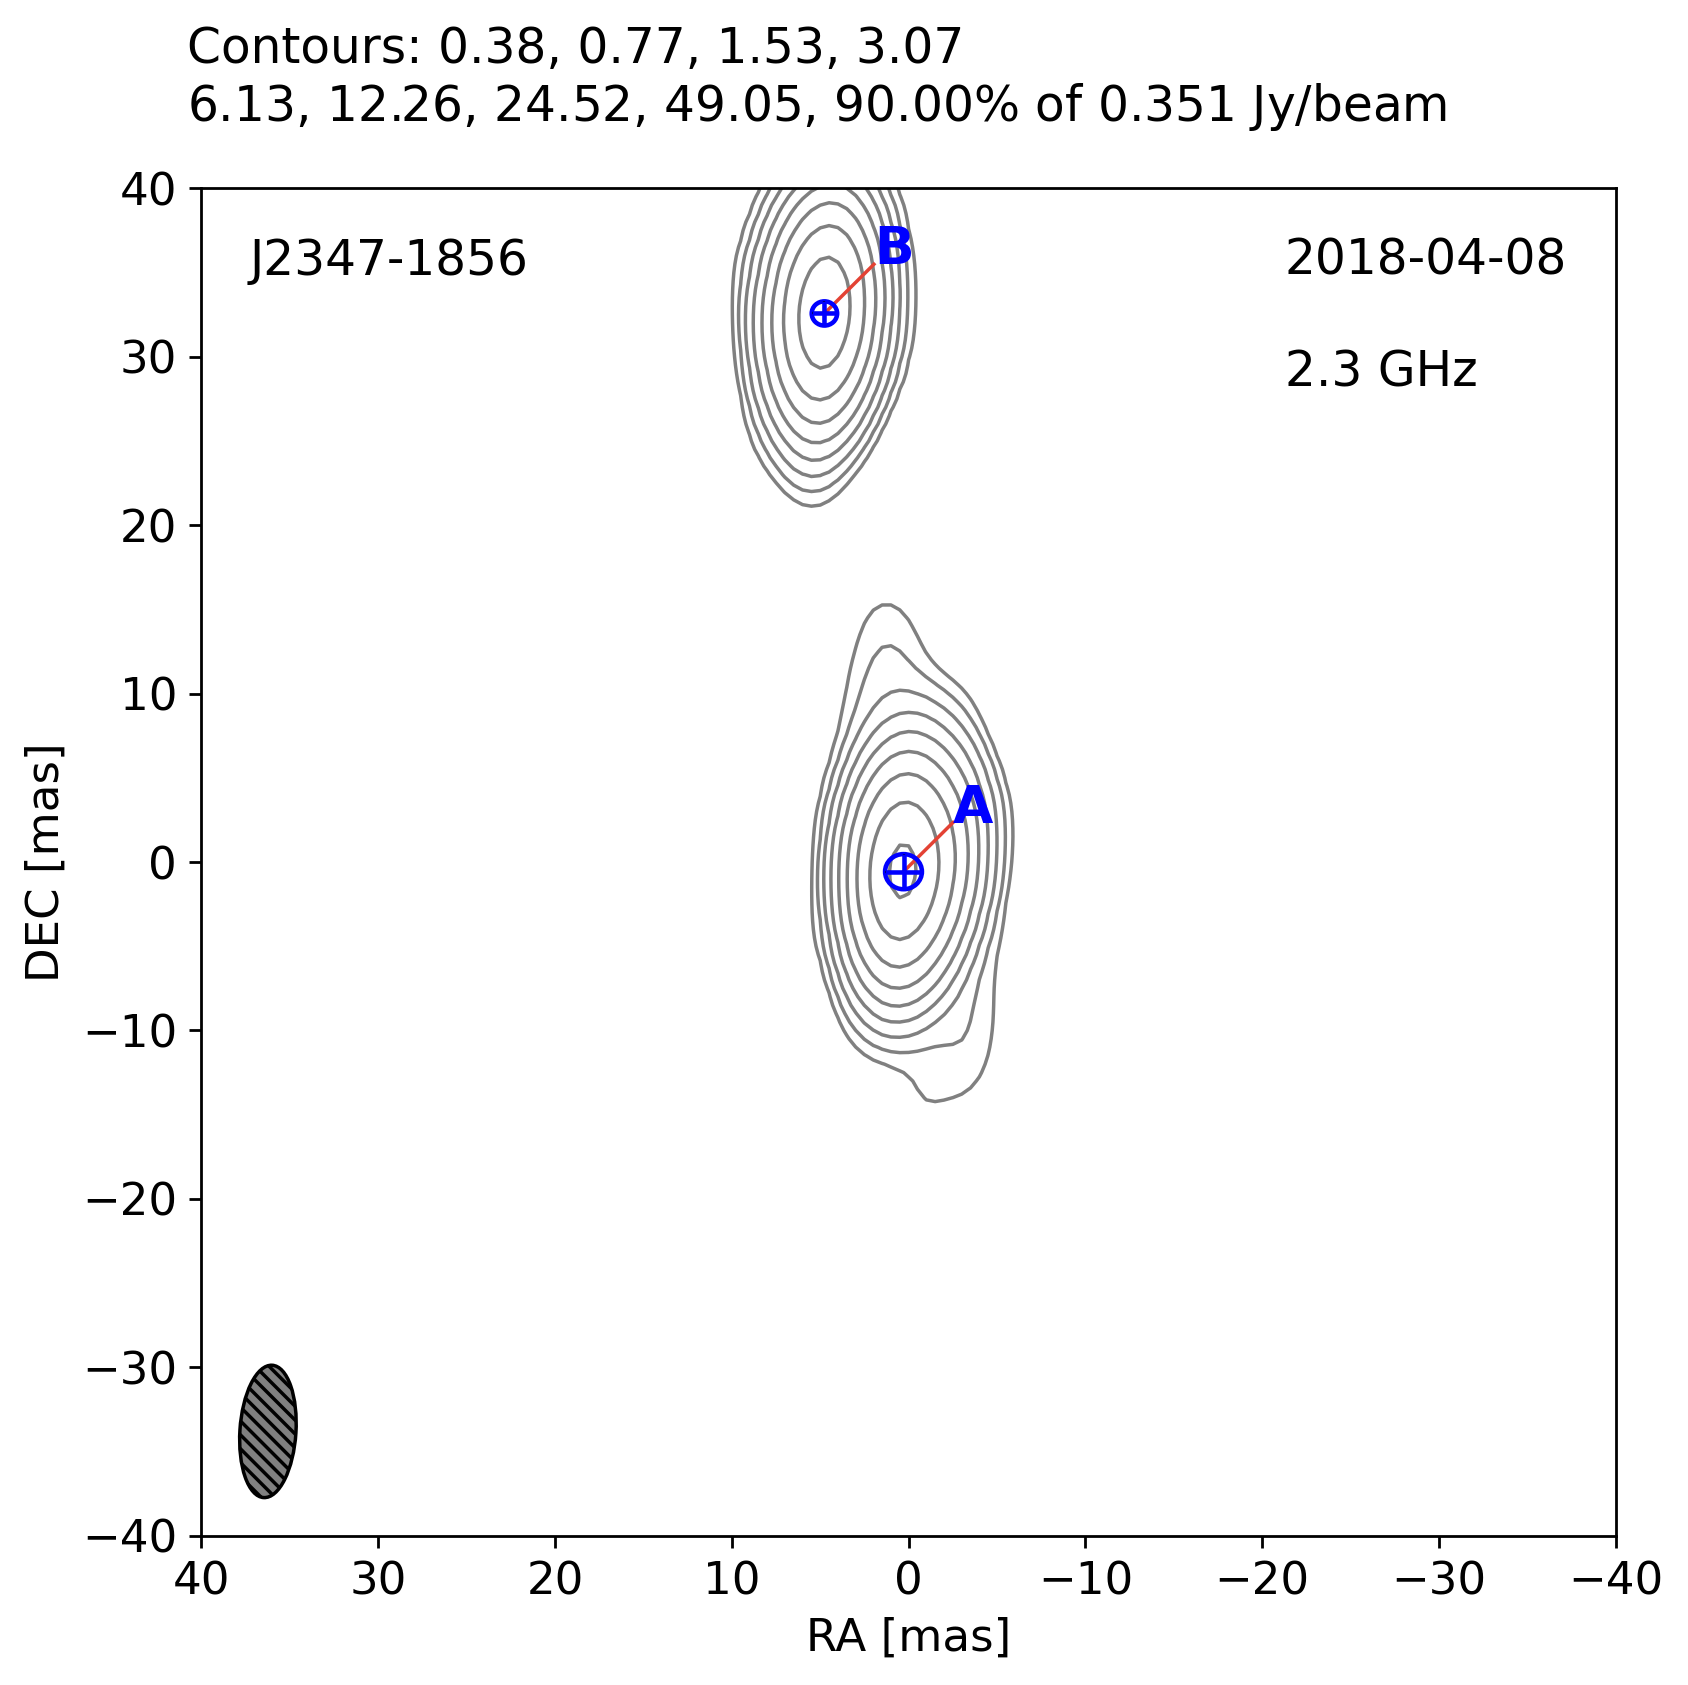

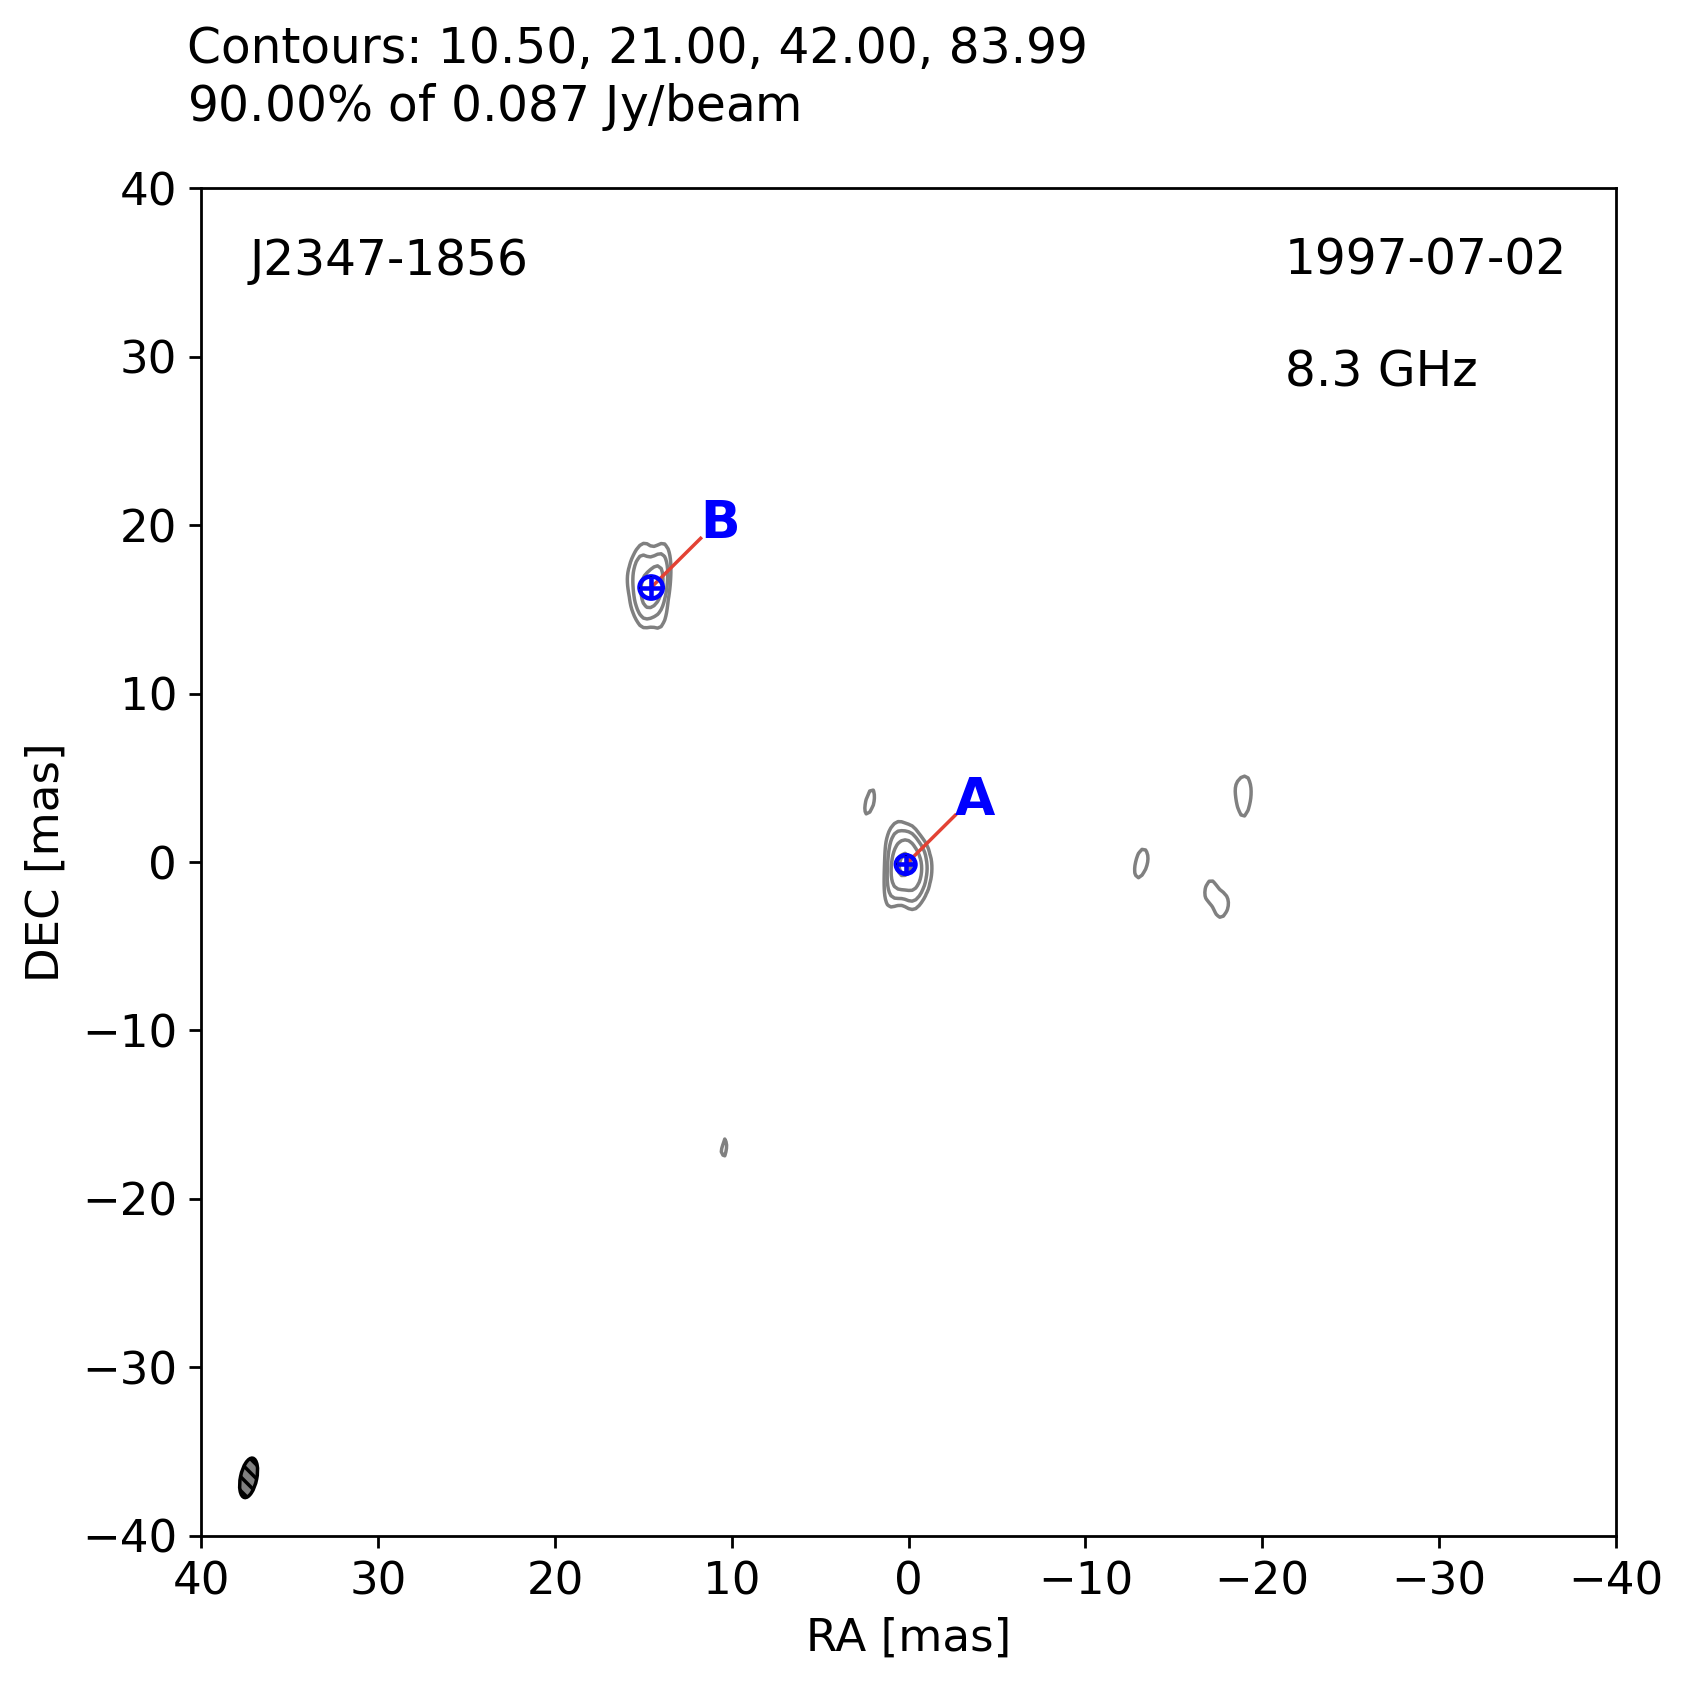

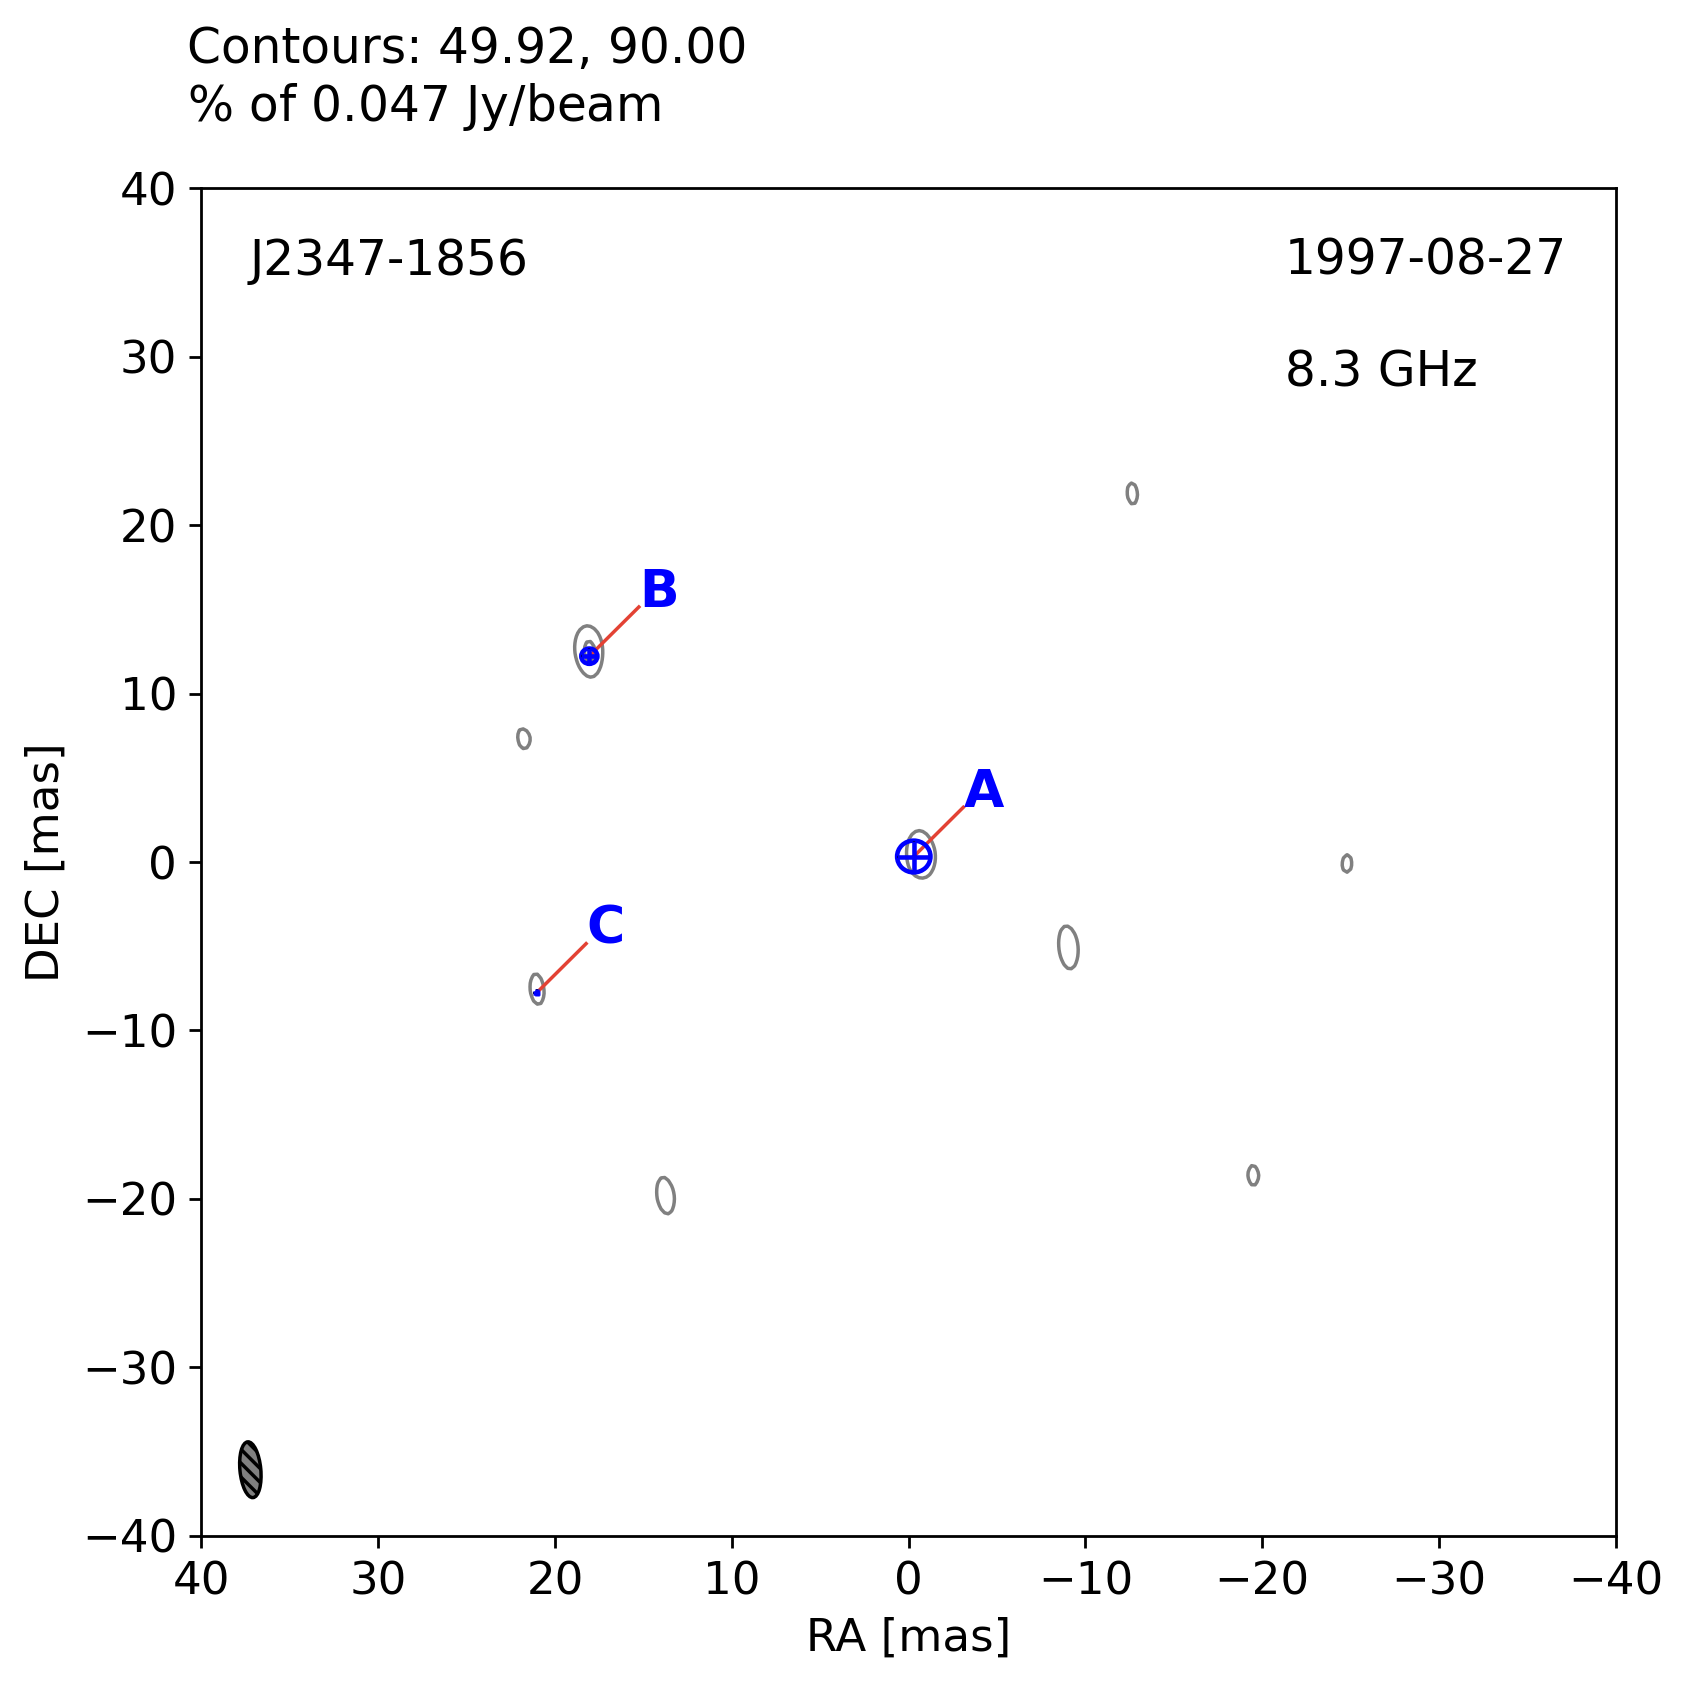

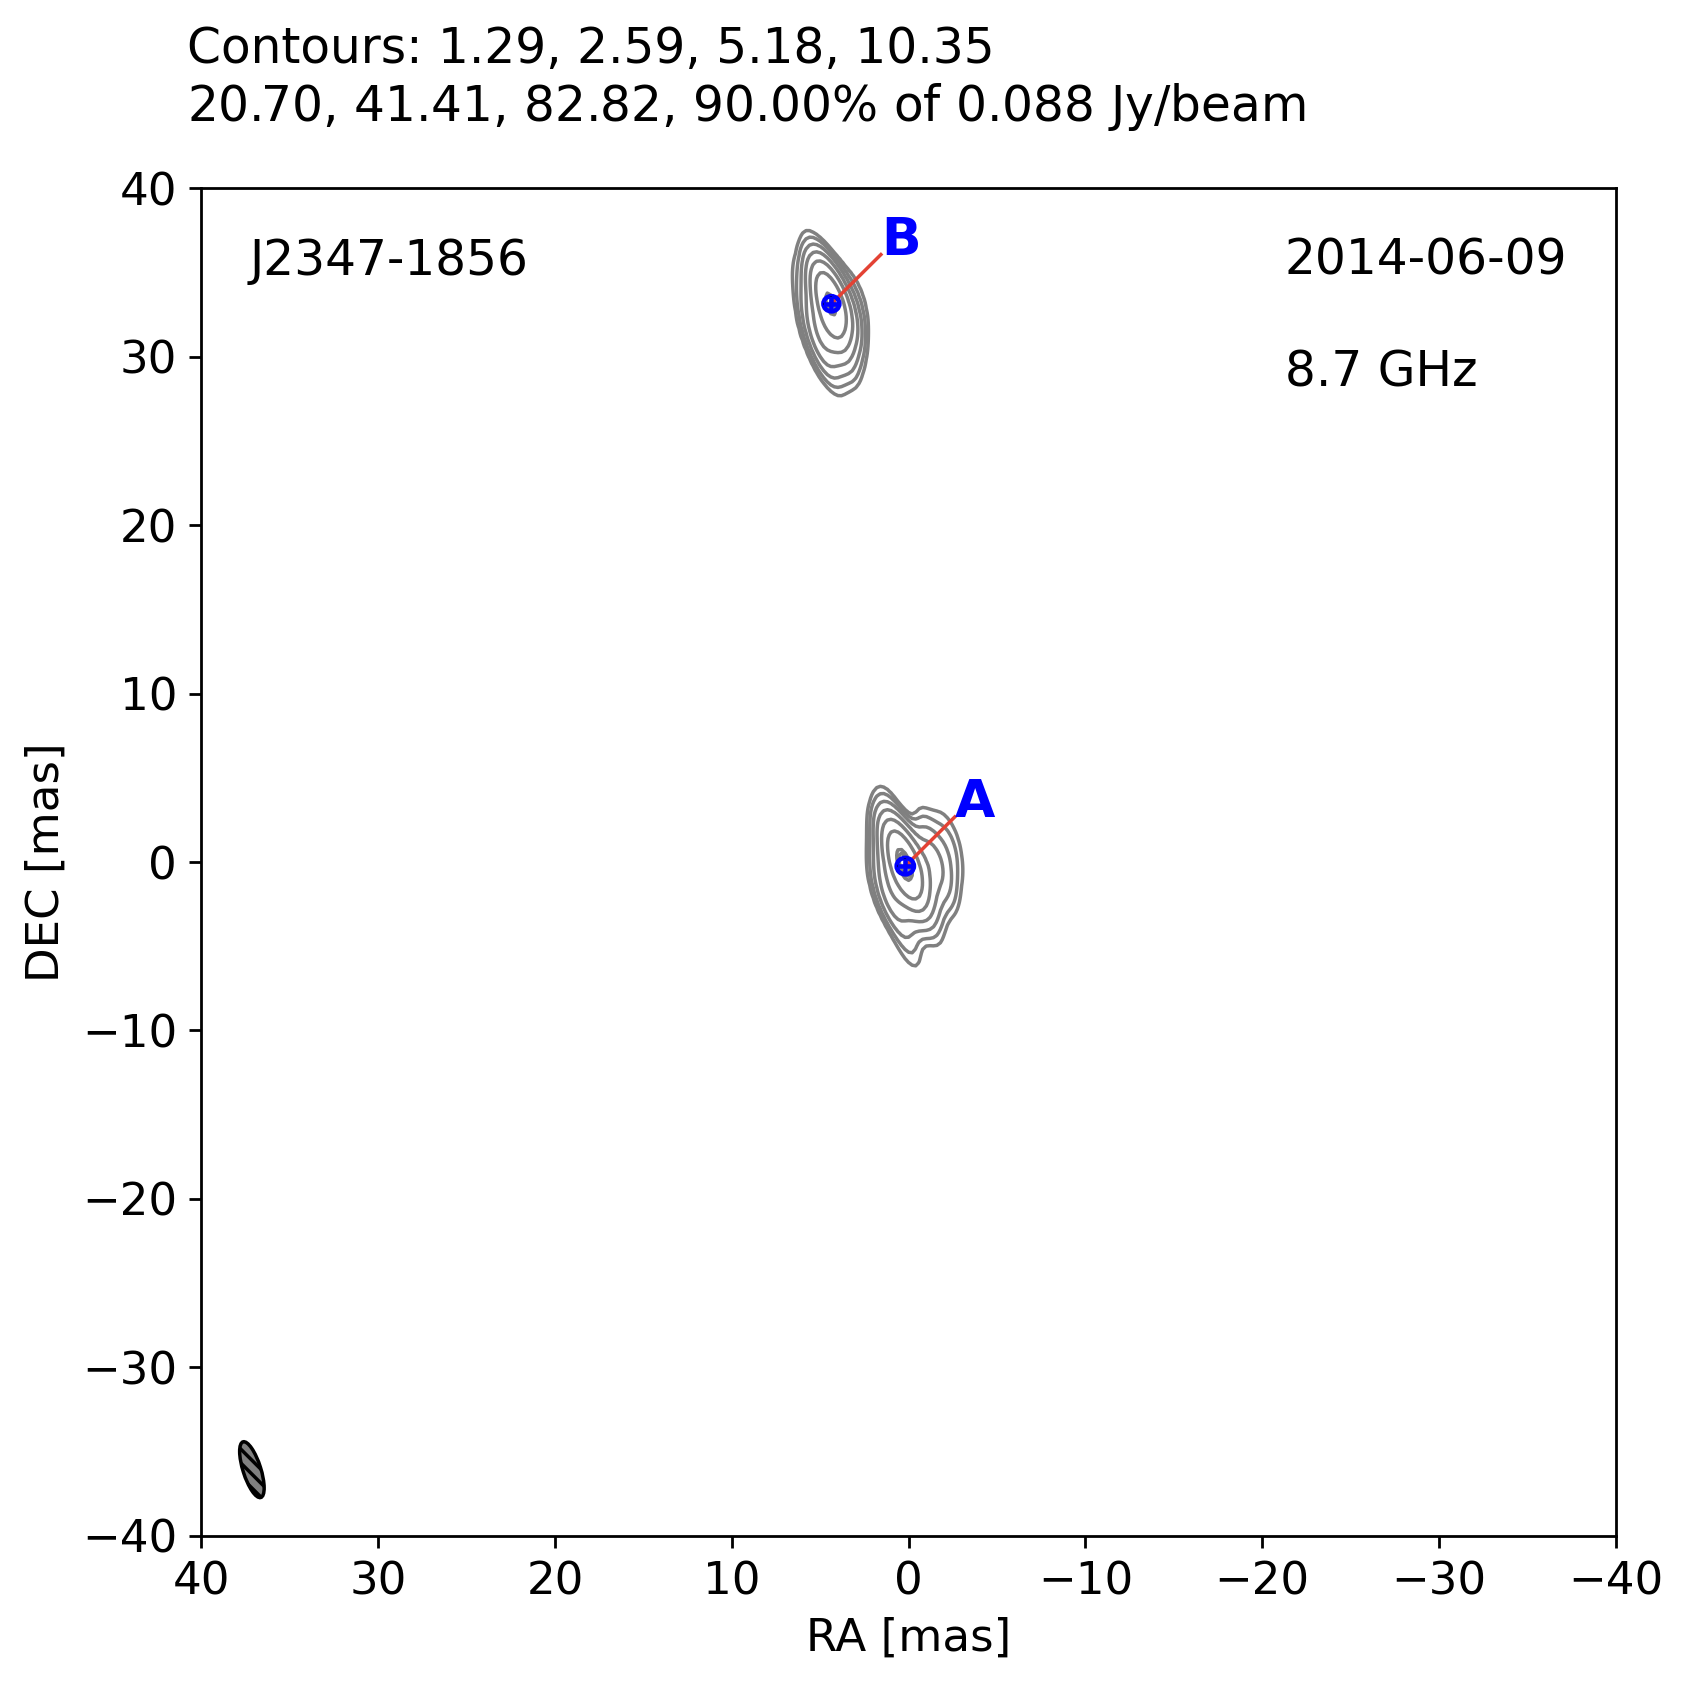

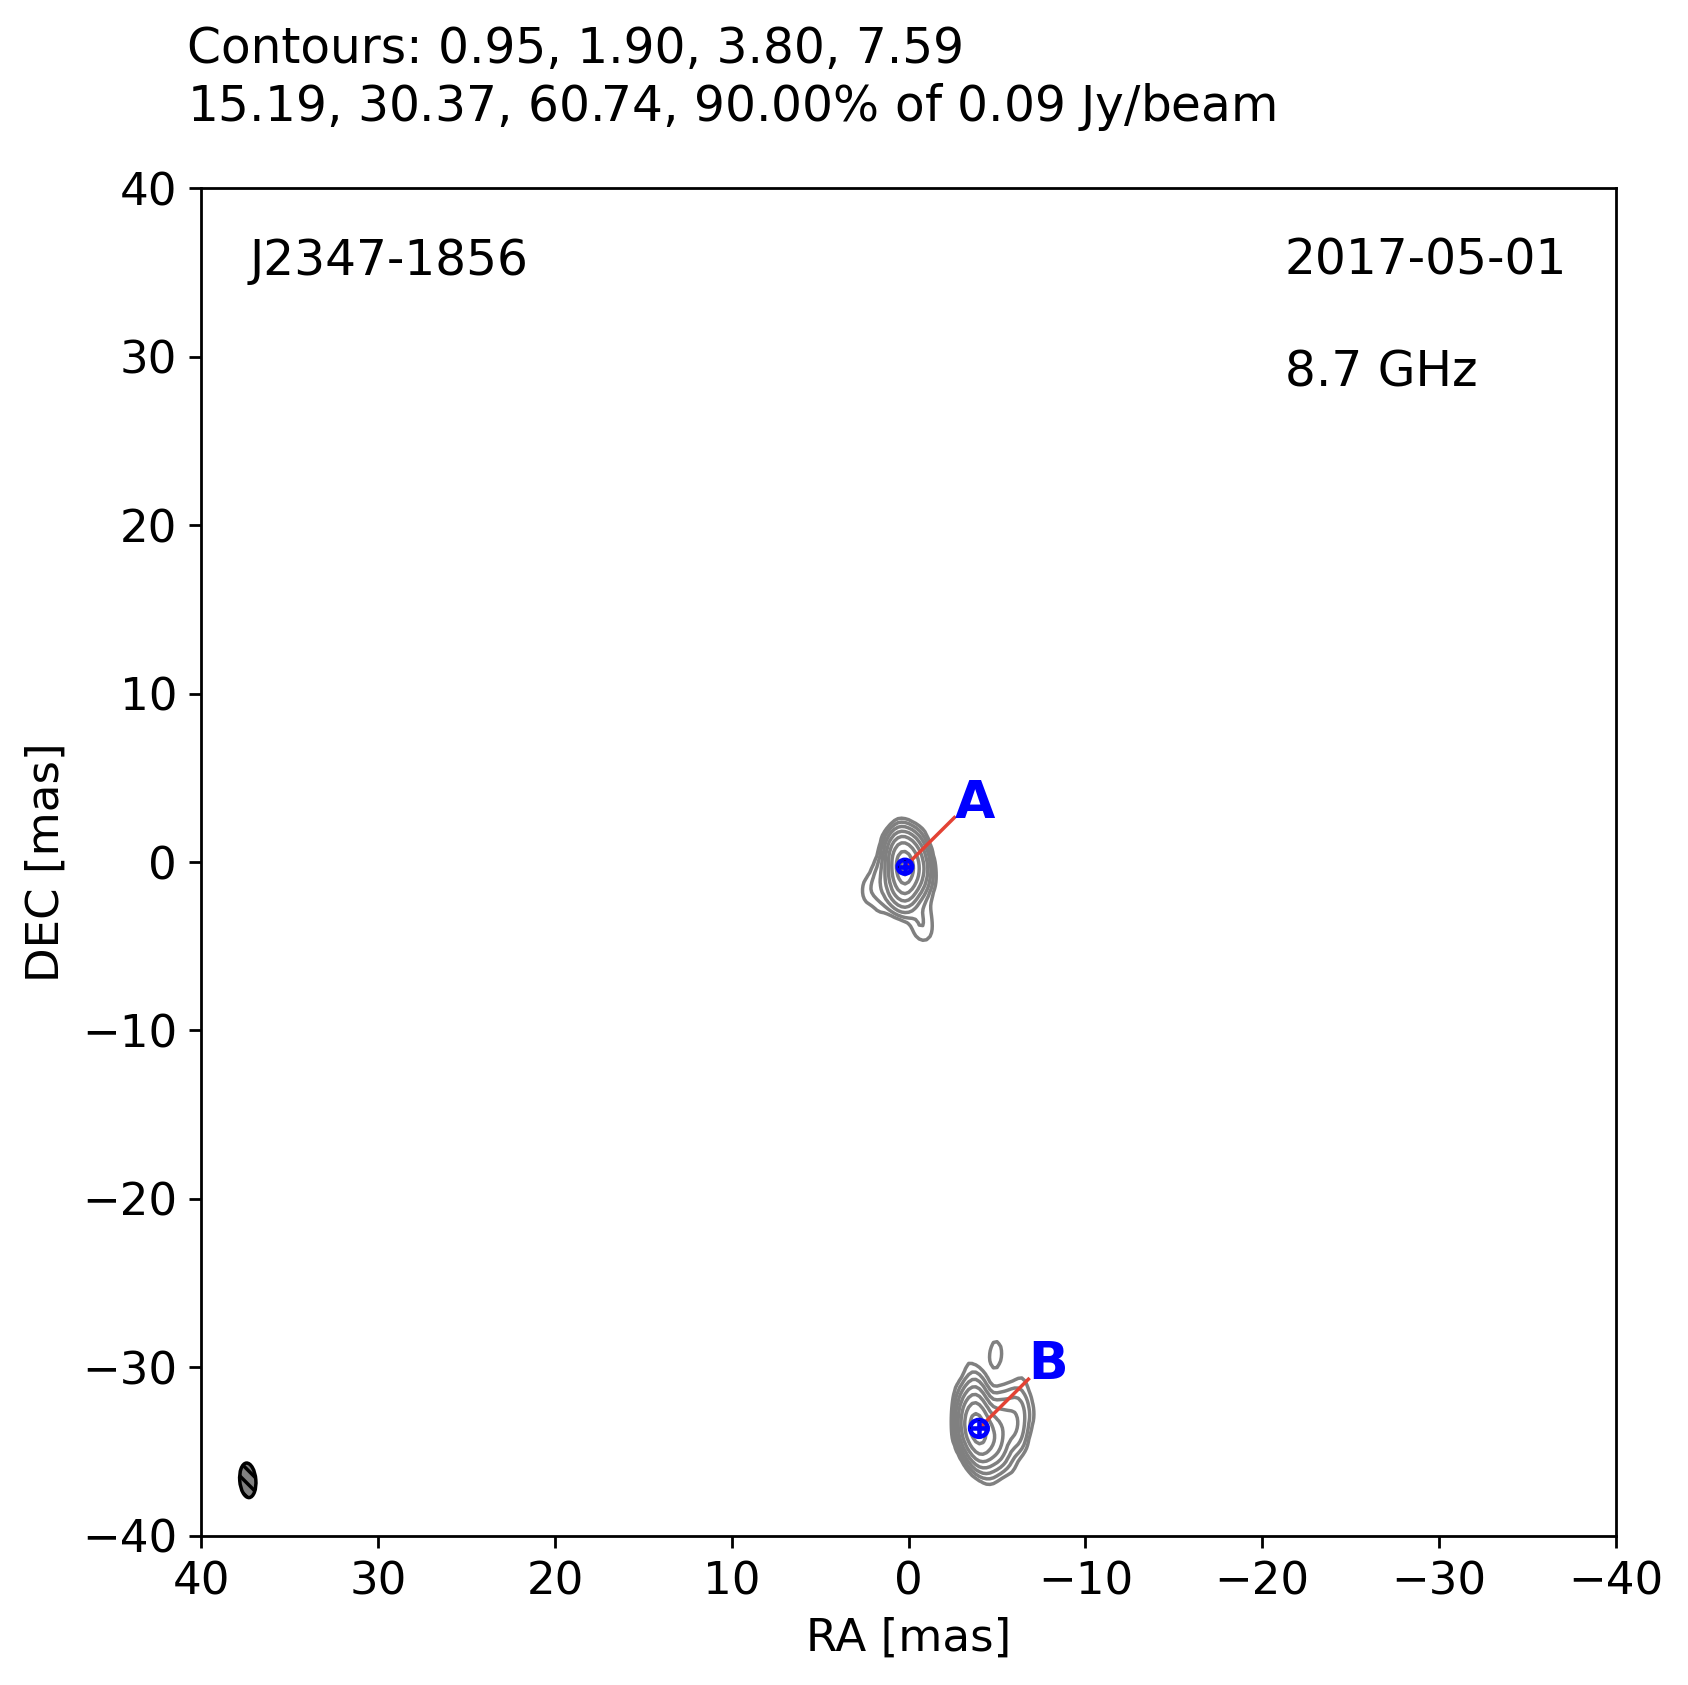

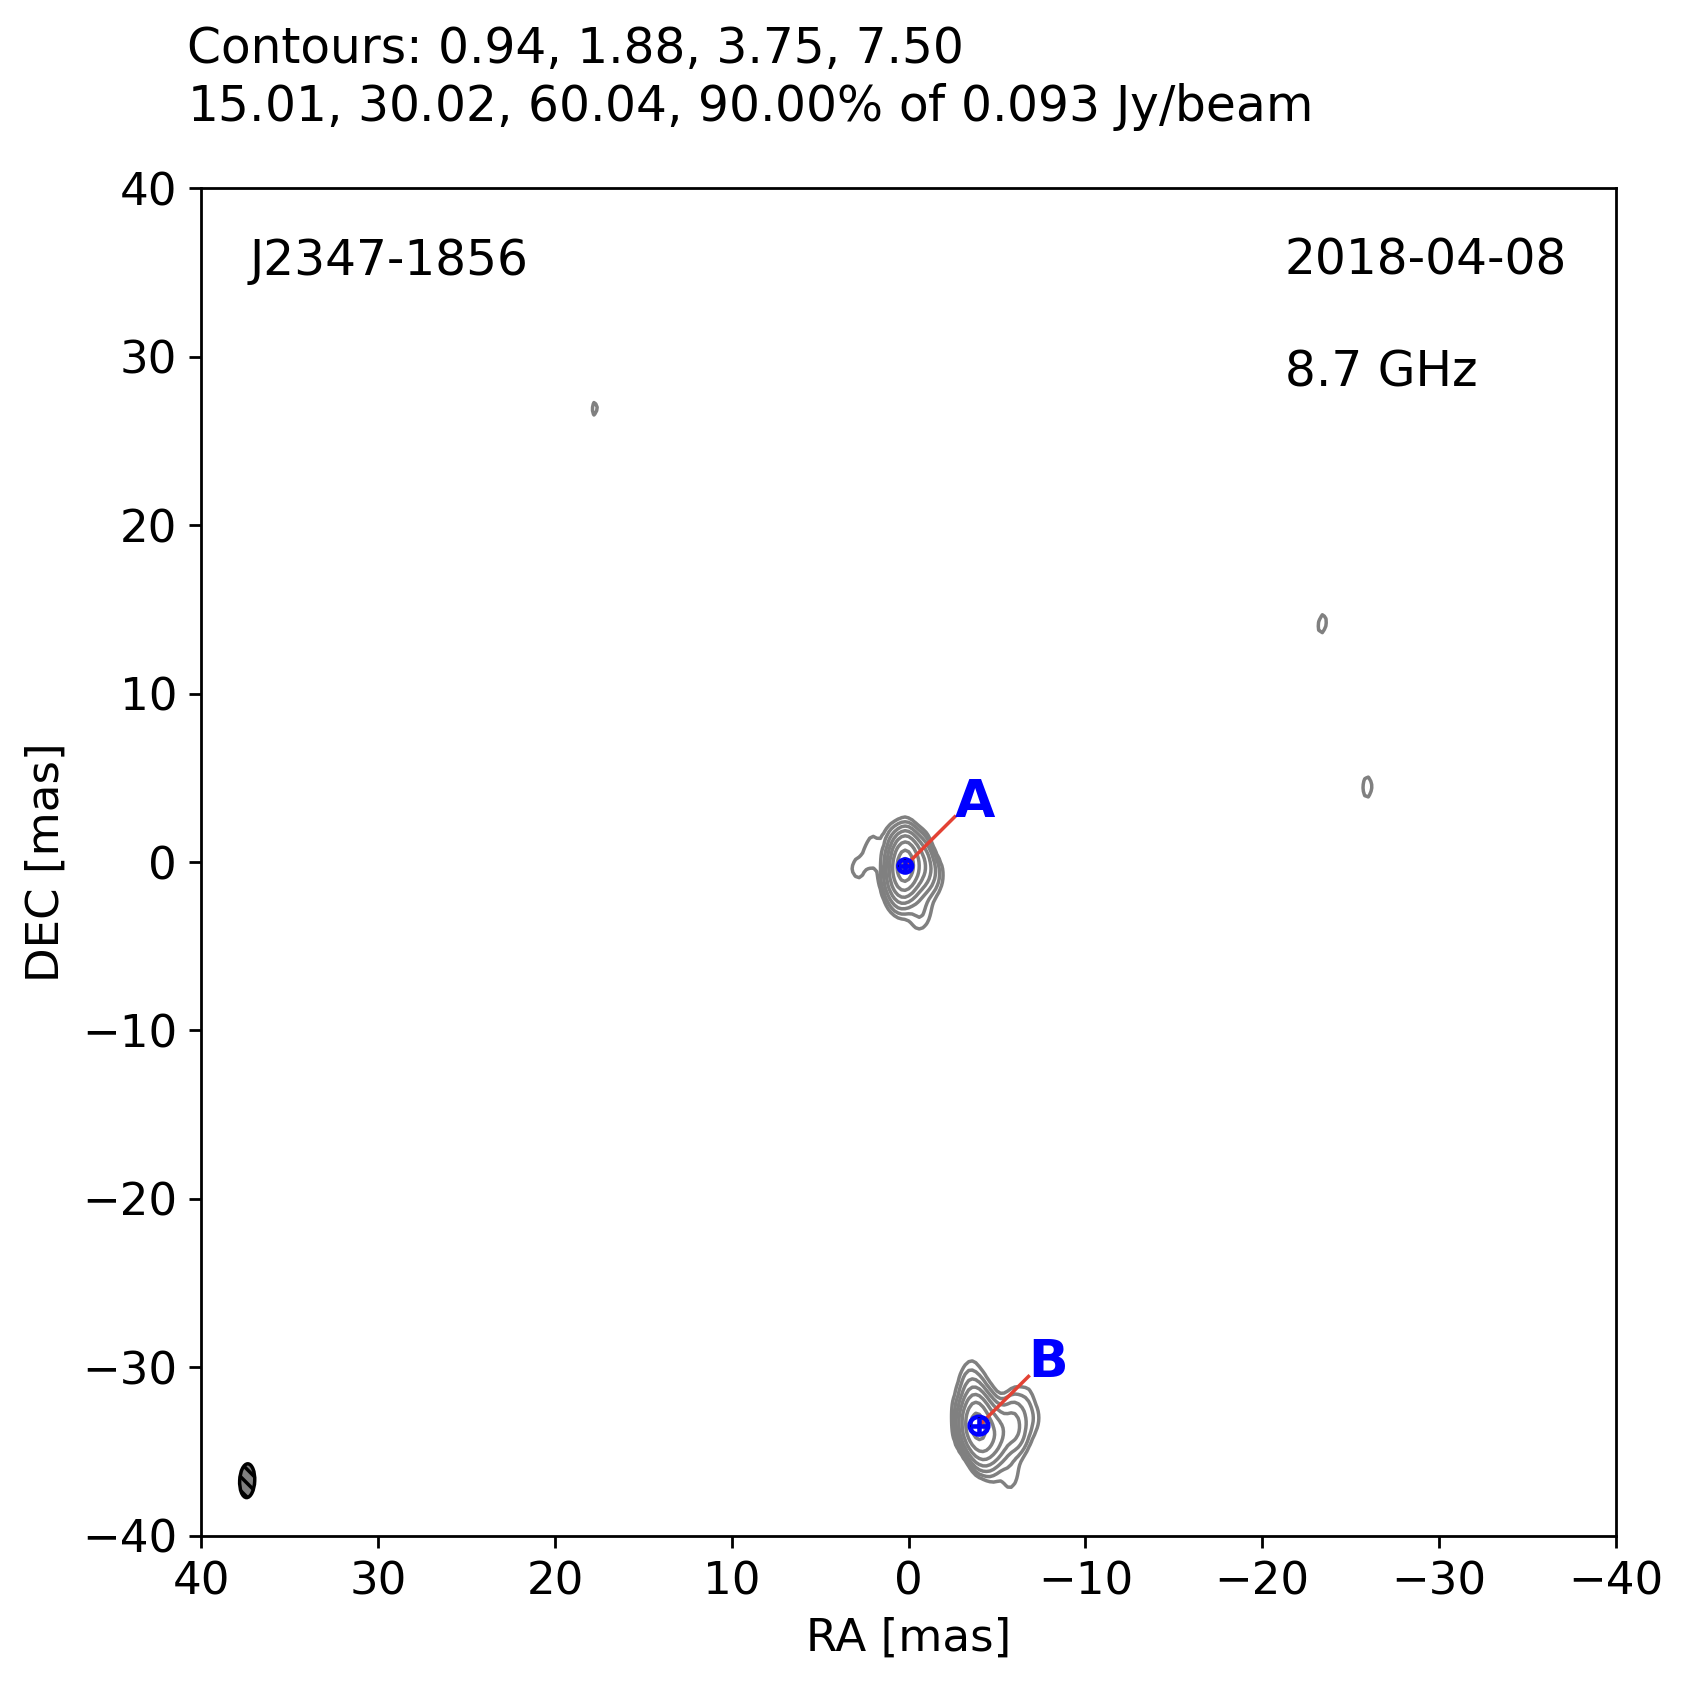

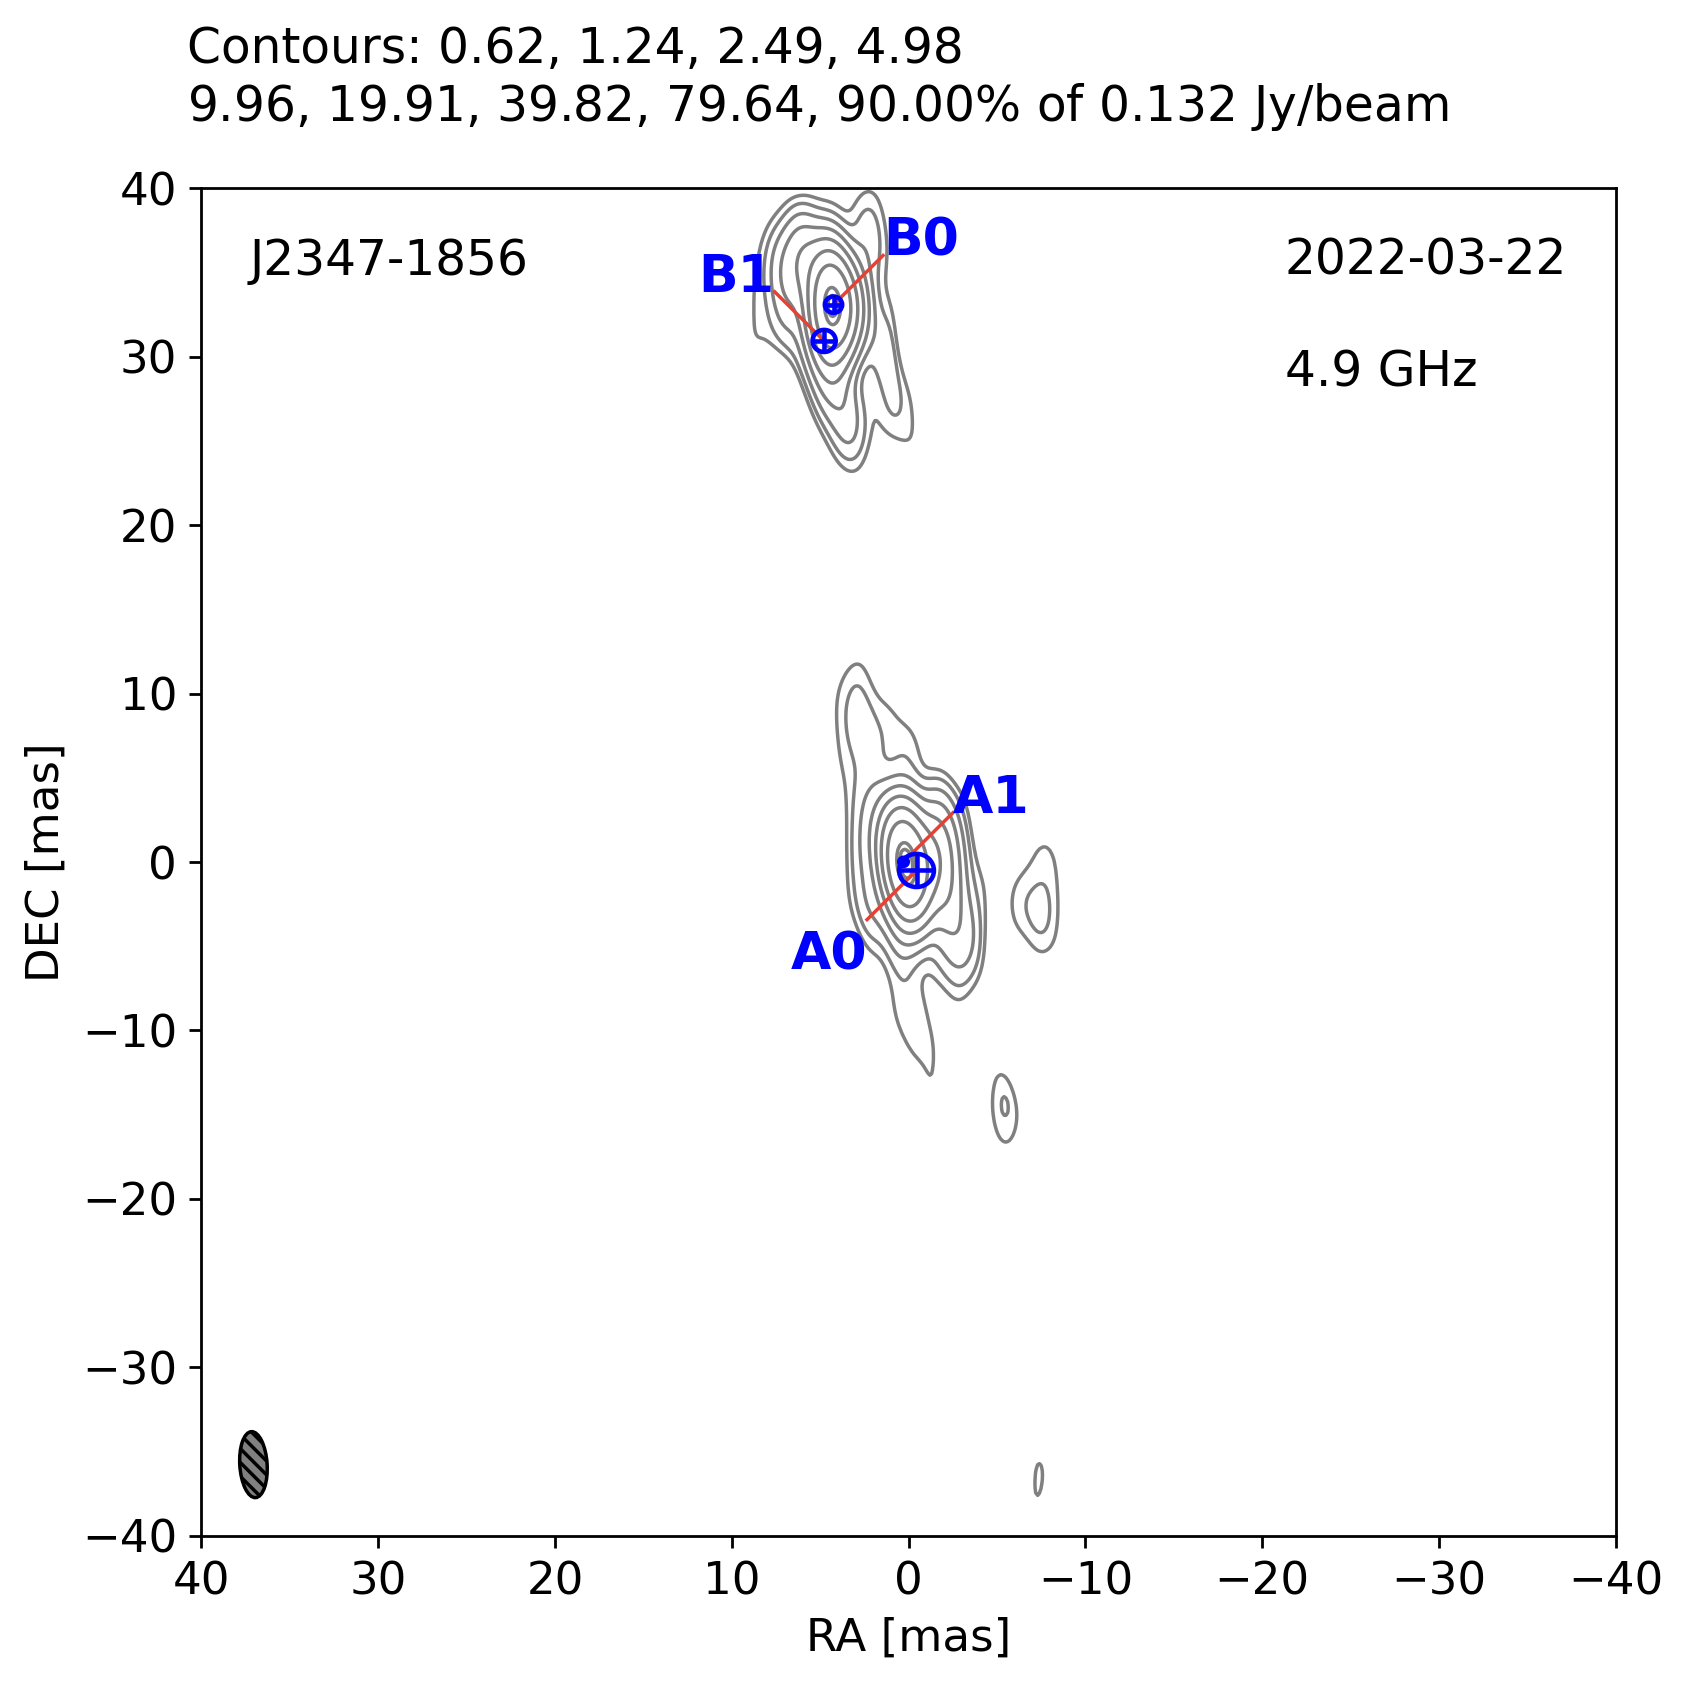

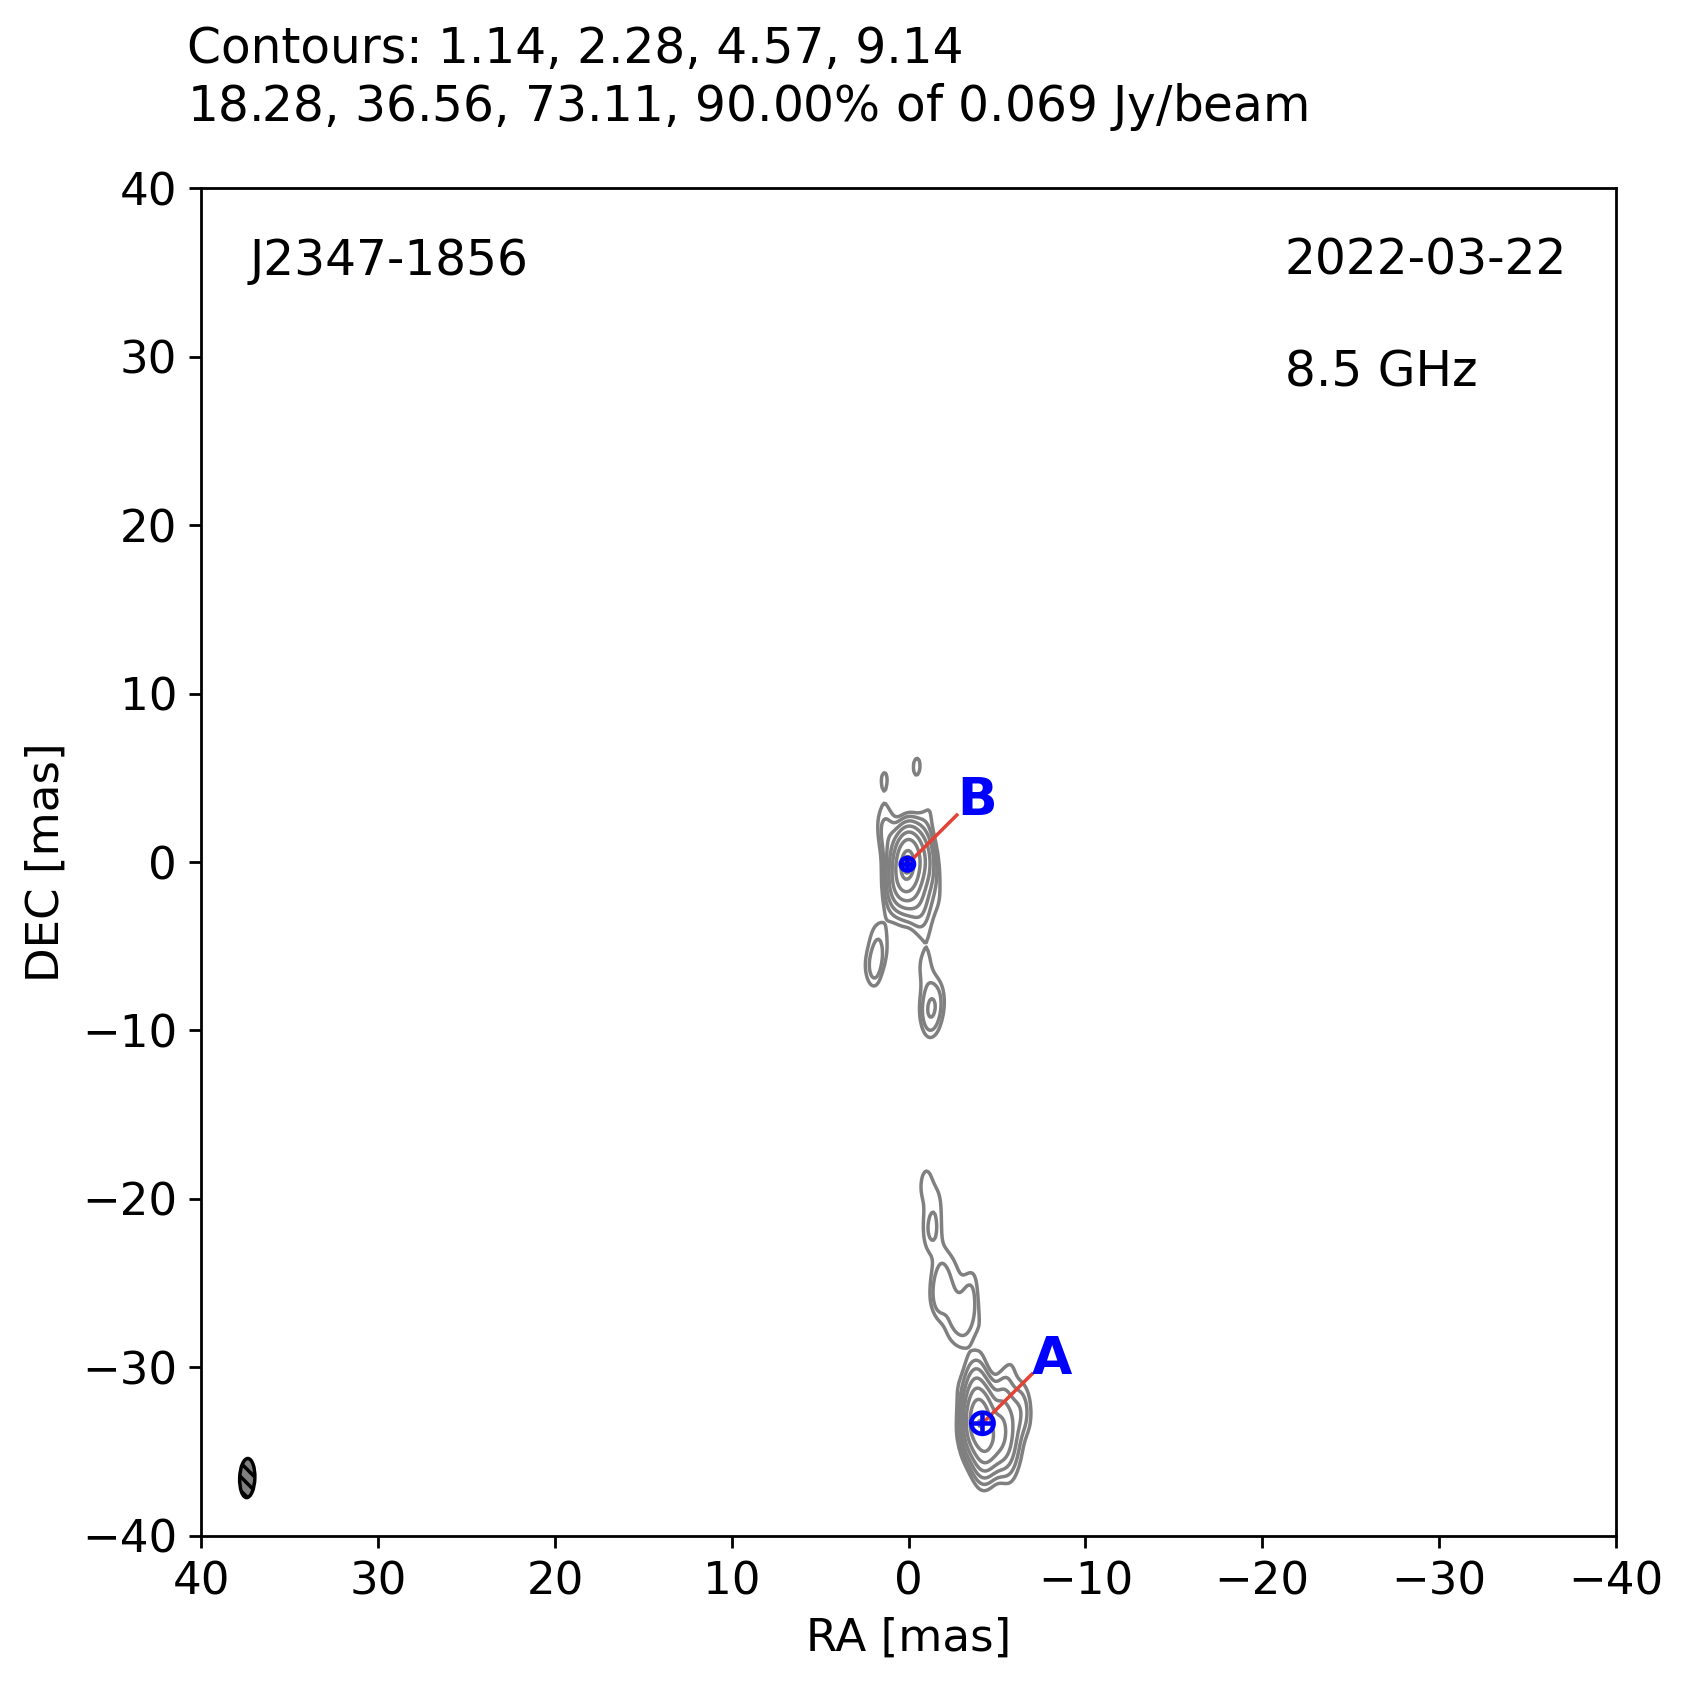

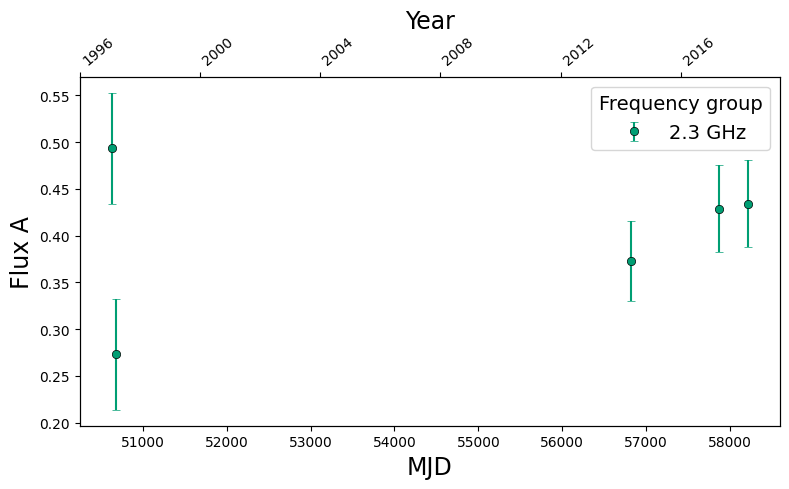

Saved: ./J2347-1856//2.3GHz_Flux_A.pdf


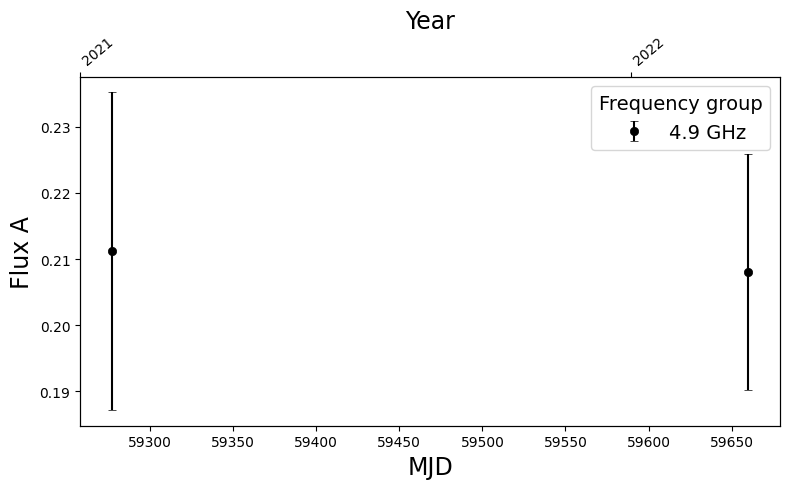

Saved: ./J2347-1856//4.9GHz_Flux_A.pdf


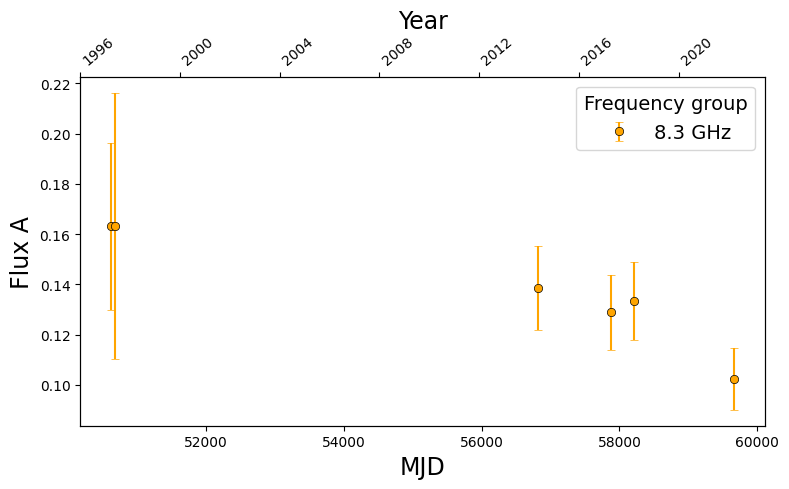

Saved: ./J2347-1856//8.3GHz_Flux_A.pdf


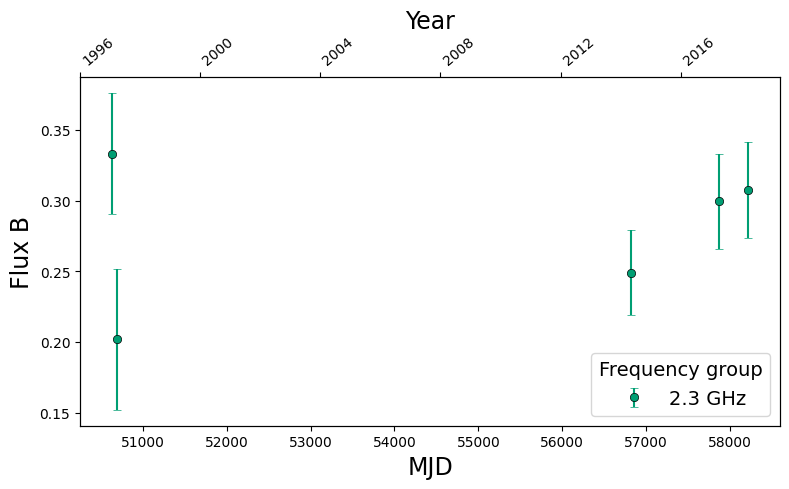

Saved: ./J2347-1856//2.3GHz_Flux_B.pdf


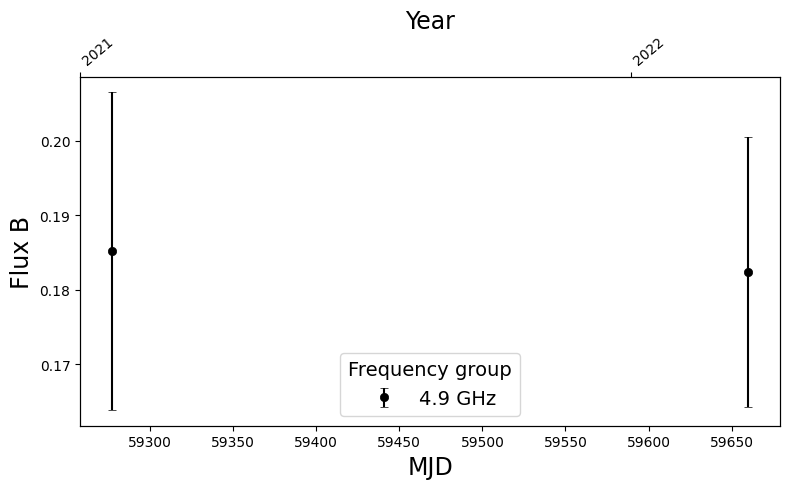

Saved: ./J2347-1856//4.9GHz_Flux_B.pdf


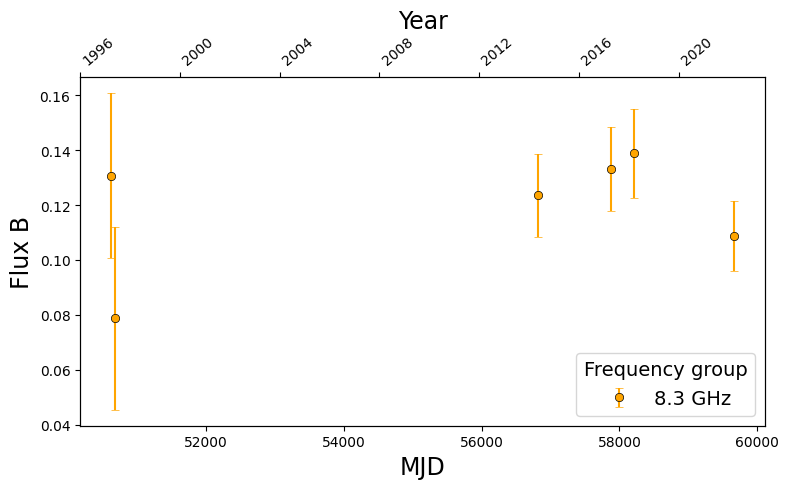

Saved: ./J2347-1856//8.3GHz_Flux_B.pdf


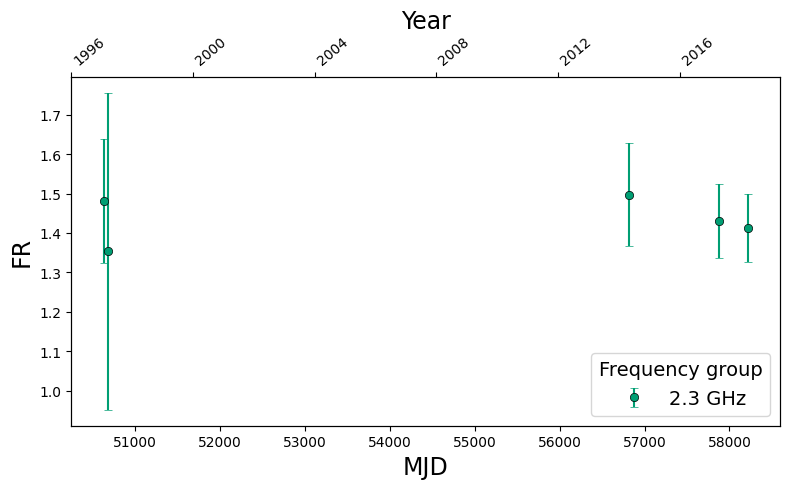

Saved: ./J2347-1856//2.3GHz_FR.pdf


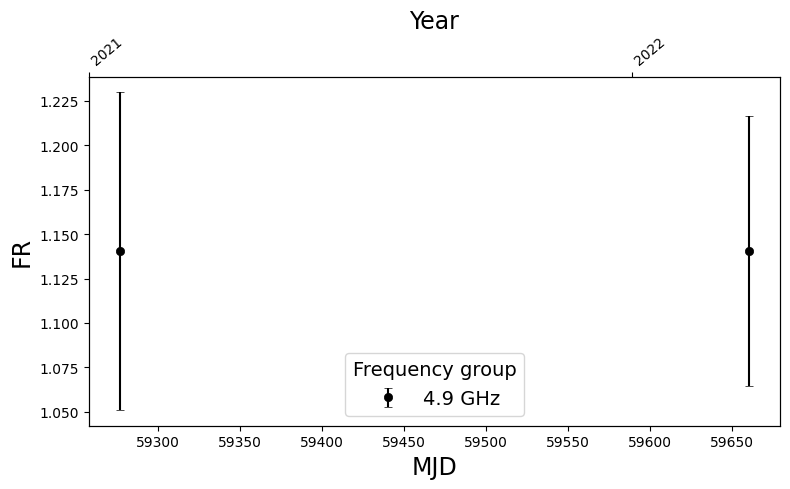

Saved: ./J2347-1856//4.9GHz_FR.pdf


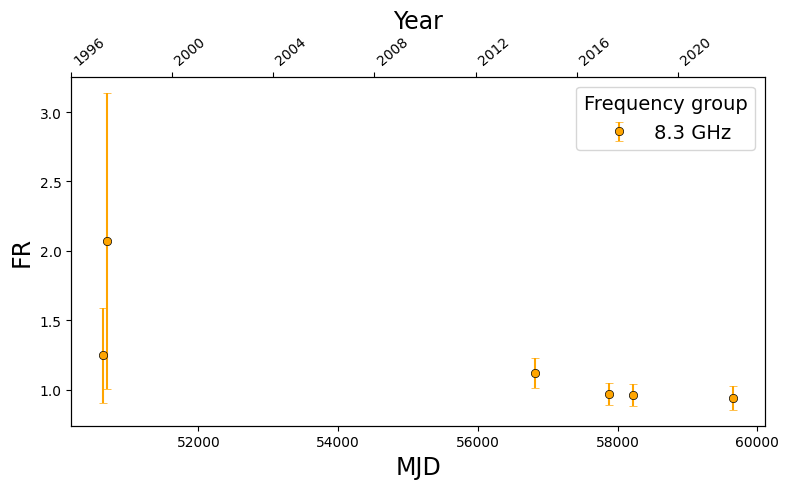

Saved: ./J2347-1856//8.3GHz_FR.pdf


# Plotting all data for FR #


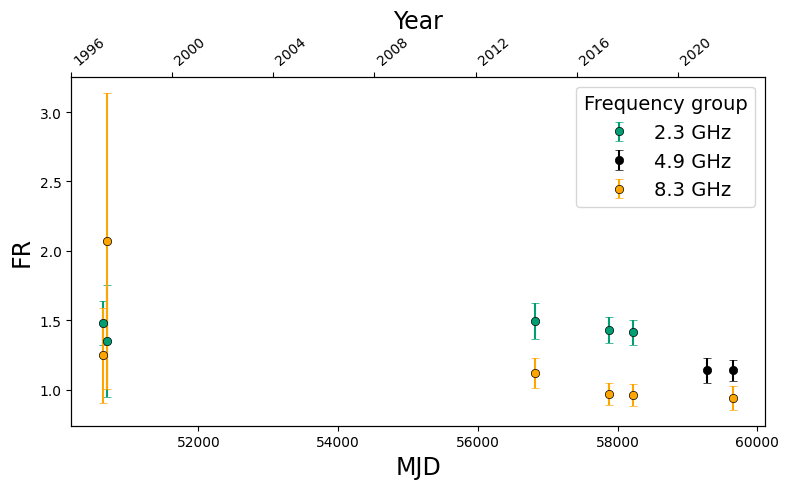

Saved combined FR plot: ./J2347-1856//all_freqs_FR.pdf


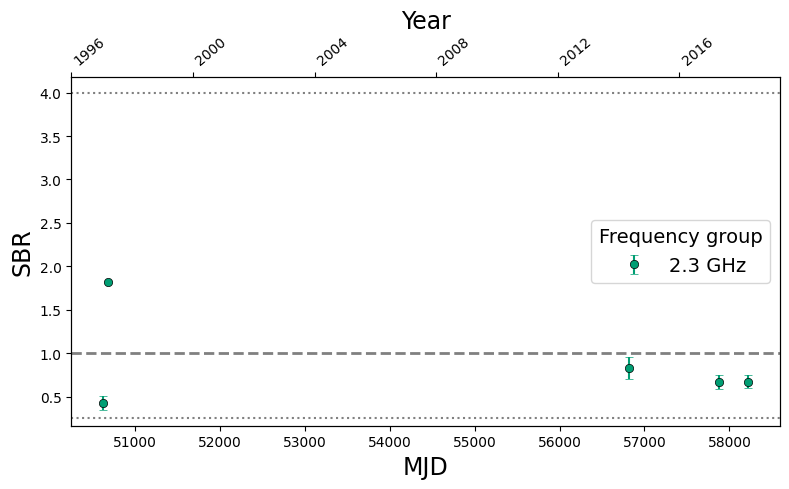

Saved: ./J2347-1856//2.3GHz_SBR.pdf


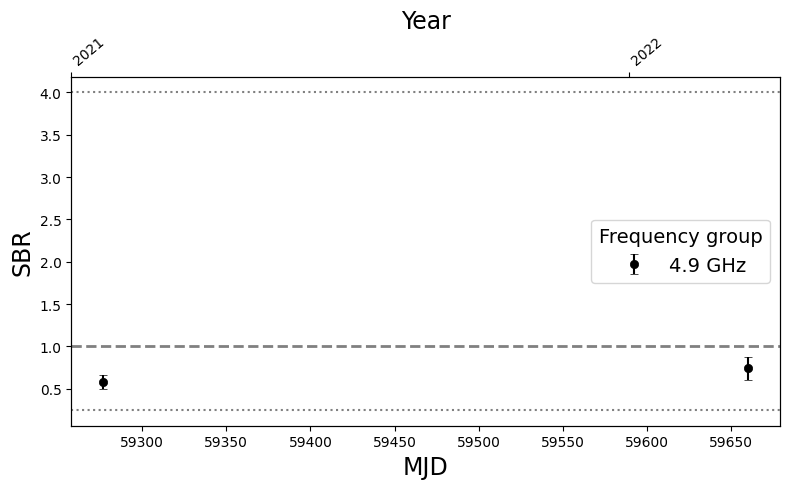

Saved: ./J2347-1856//4.9GHz_SBR.pdf


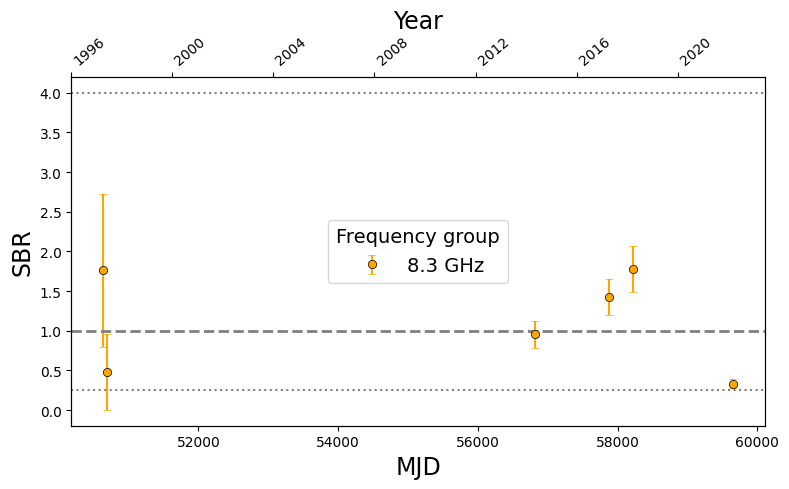

Saved: ./J2347-1856//8.3GHz_SBR.pdf


# Plotting all data for SBR #


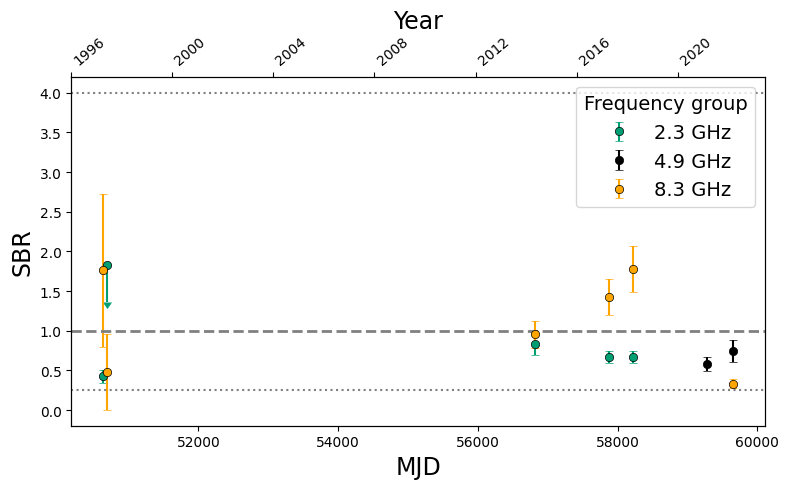

Saved combined SBR plot: ./J2347-1856//all_freqs_SBR.pdf


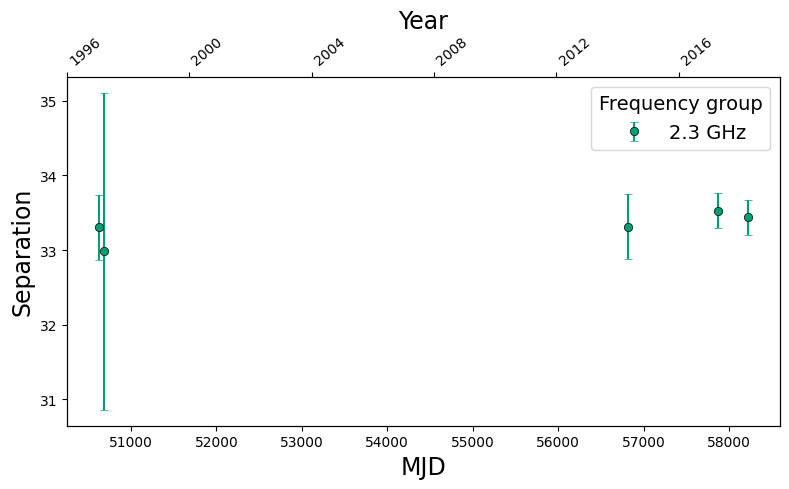

Saved: ./J2347-1856//2.3GHz_Separation.pdf


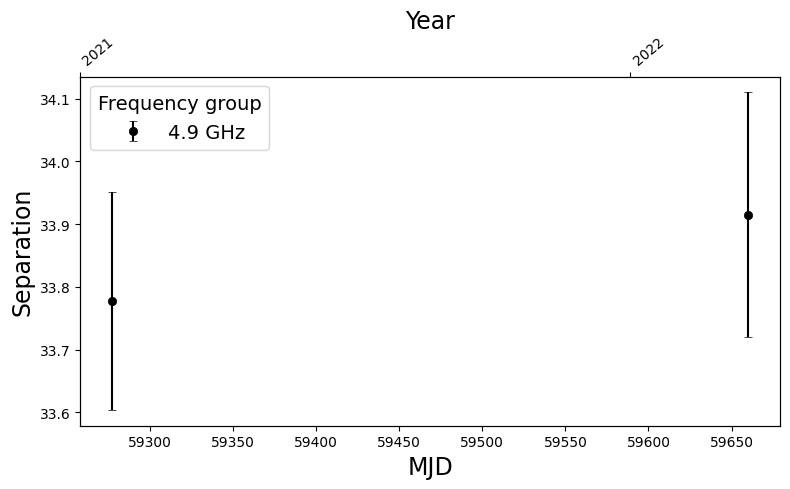

Saved: ./J2347-1856//4.9GHz_Separation.pdf


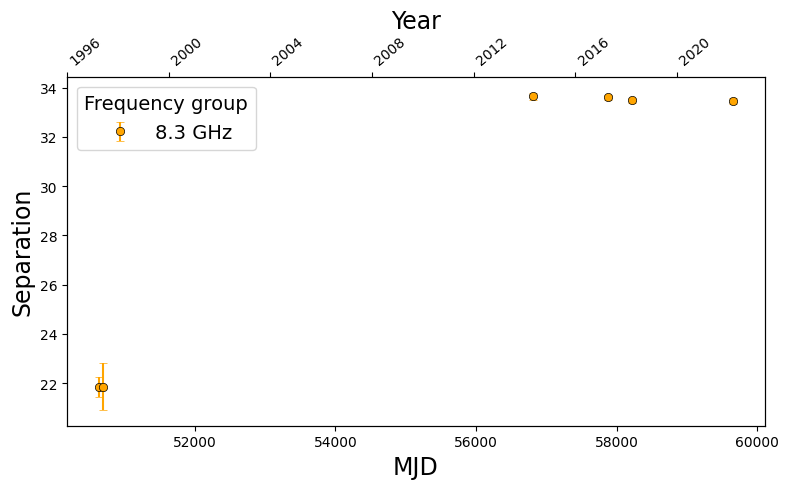

Saved: ./J2347-1856//8.3GHz_Separation.pdf


In [5]:
# Now let us plot the results.

# This plots all the images with modelfit components in the respective folders.
J2347.plot_images_all(show=True)
# This creates several summary plots in the summary folder.
J2347.plot_all(show=True)

Currently loaded datasets (epoch, freq):
0 2021-03-04 4926490000.0
1 1997-07-02 2269474375.0
2 1997-08-27 2269474375.0
3 2014-06-09 2291875000.0
4 2017-05-01 2252000000.0
5 2018-04-08 2252000000.0
6 1997-07-02 8339474375.0
7 1997-08-27 8339474375.0
8 2014-06-09 8667875000.0
9 2017-05-01 8652000000.0
10 2018-04-08 8652000000.0
11 2022-03-22 4867750000.0
12 2022-03-22 8496000000.0


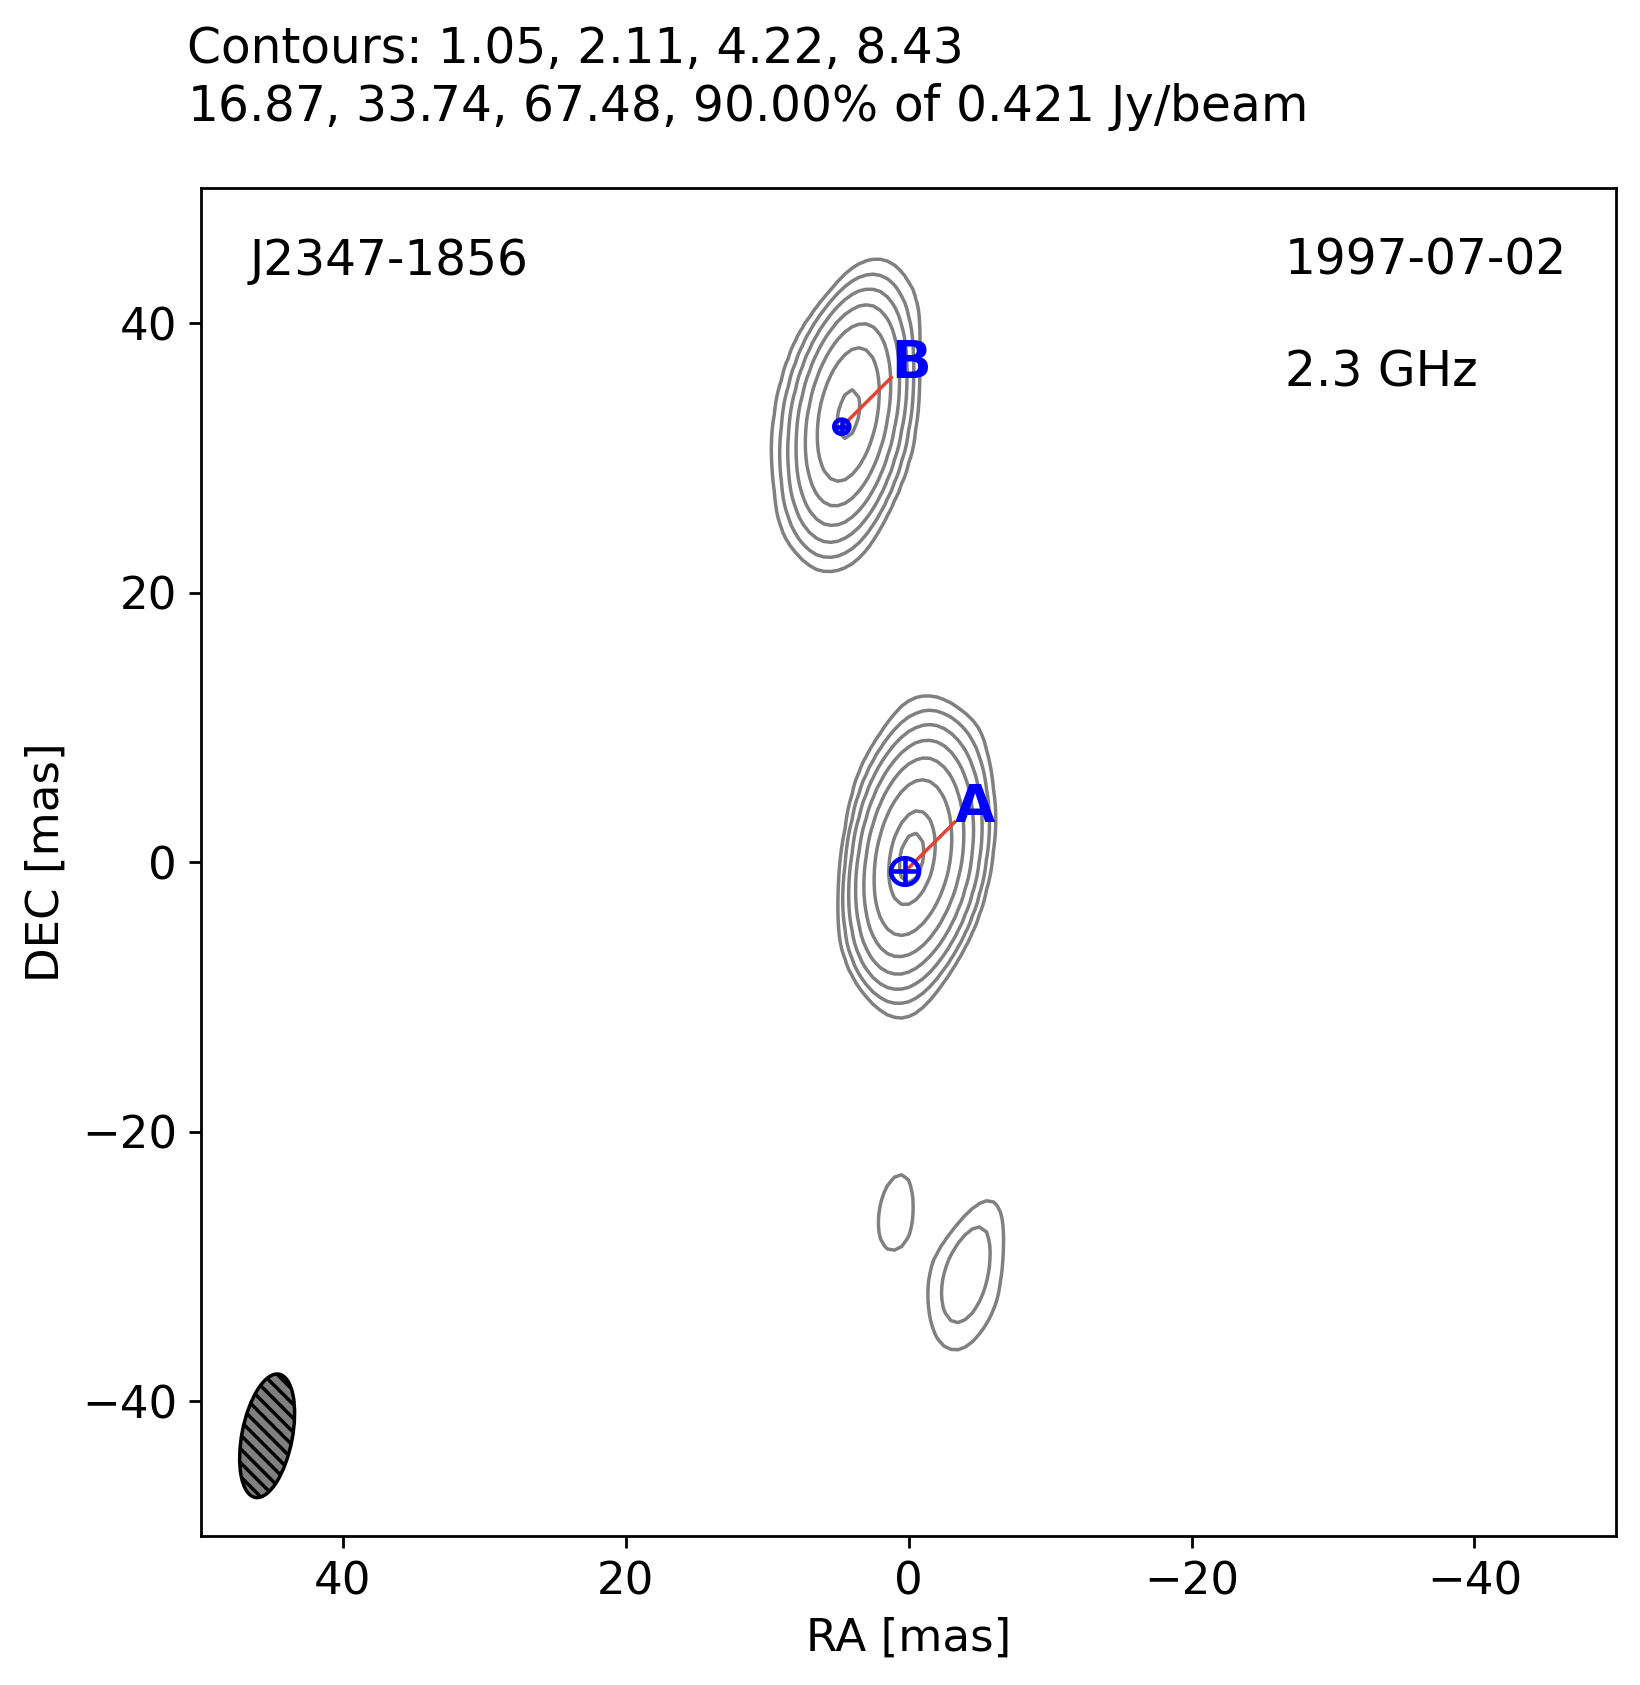

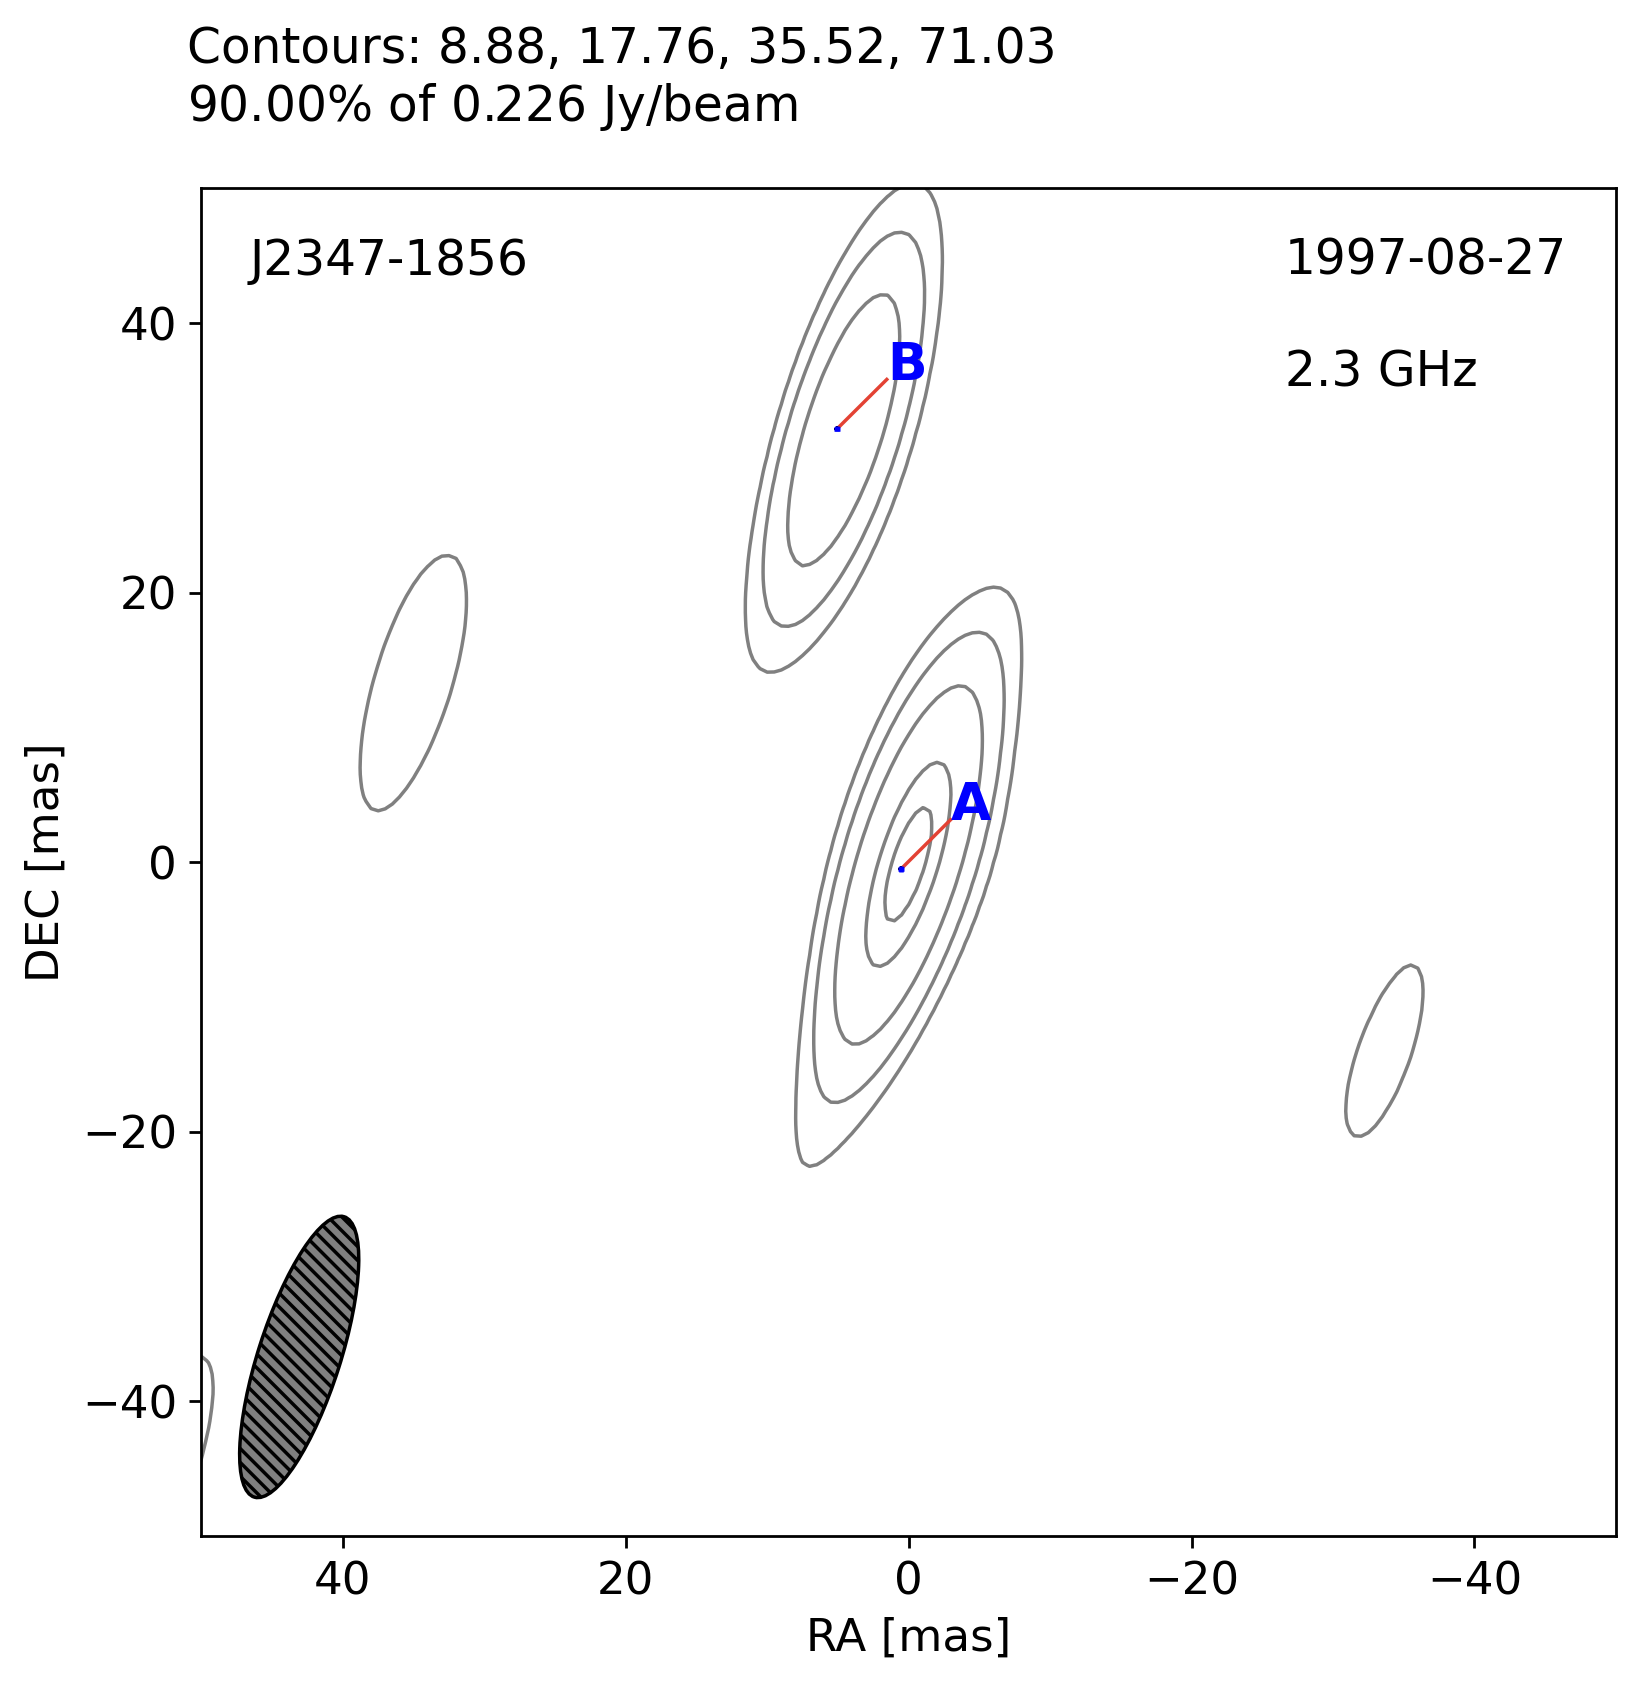

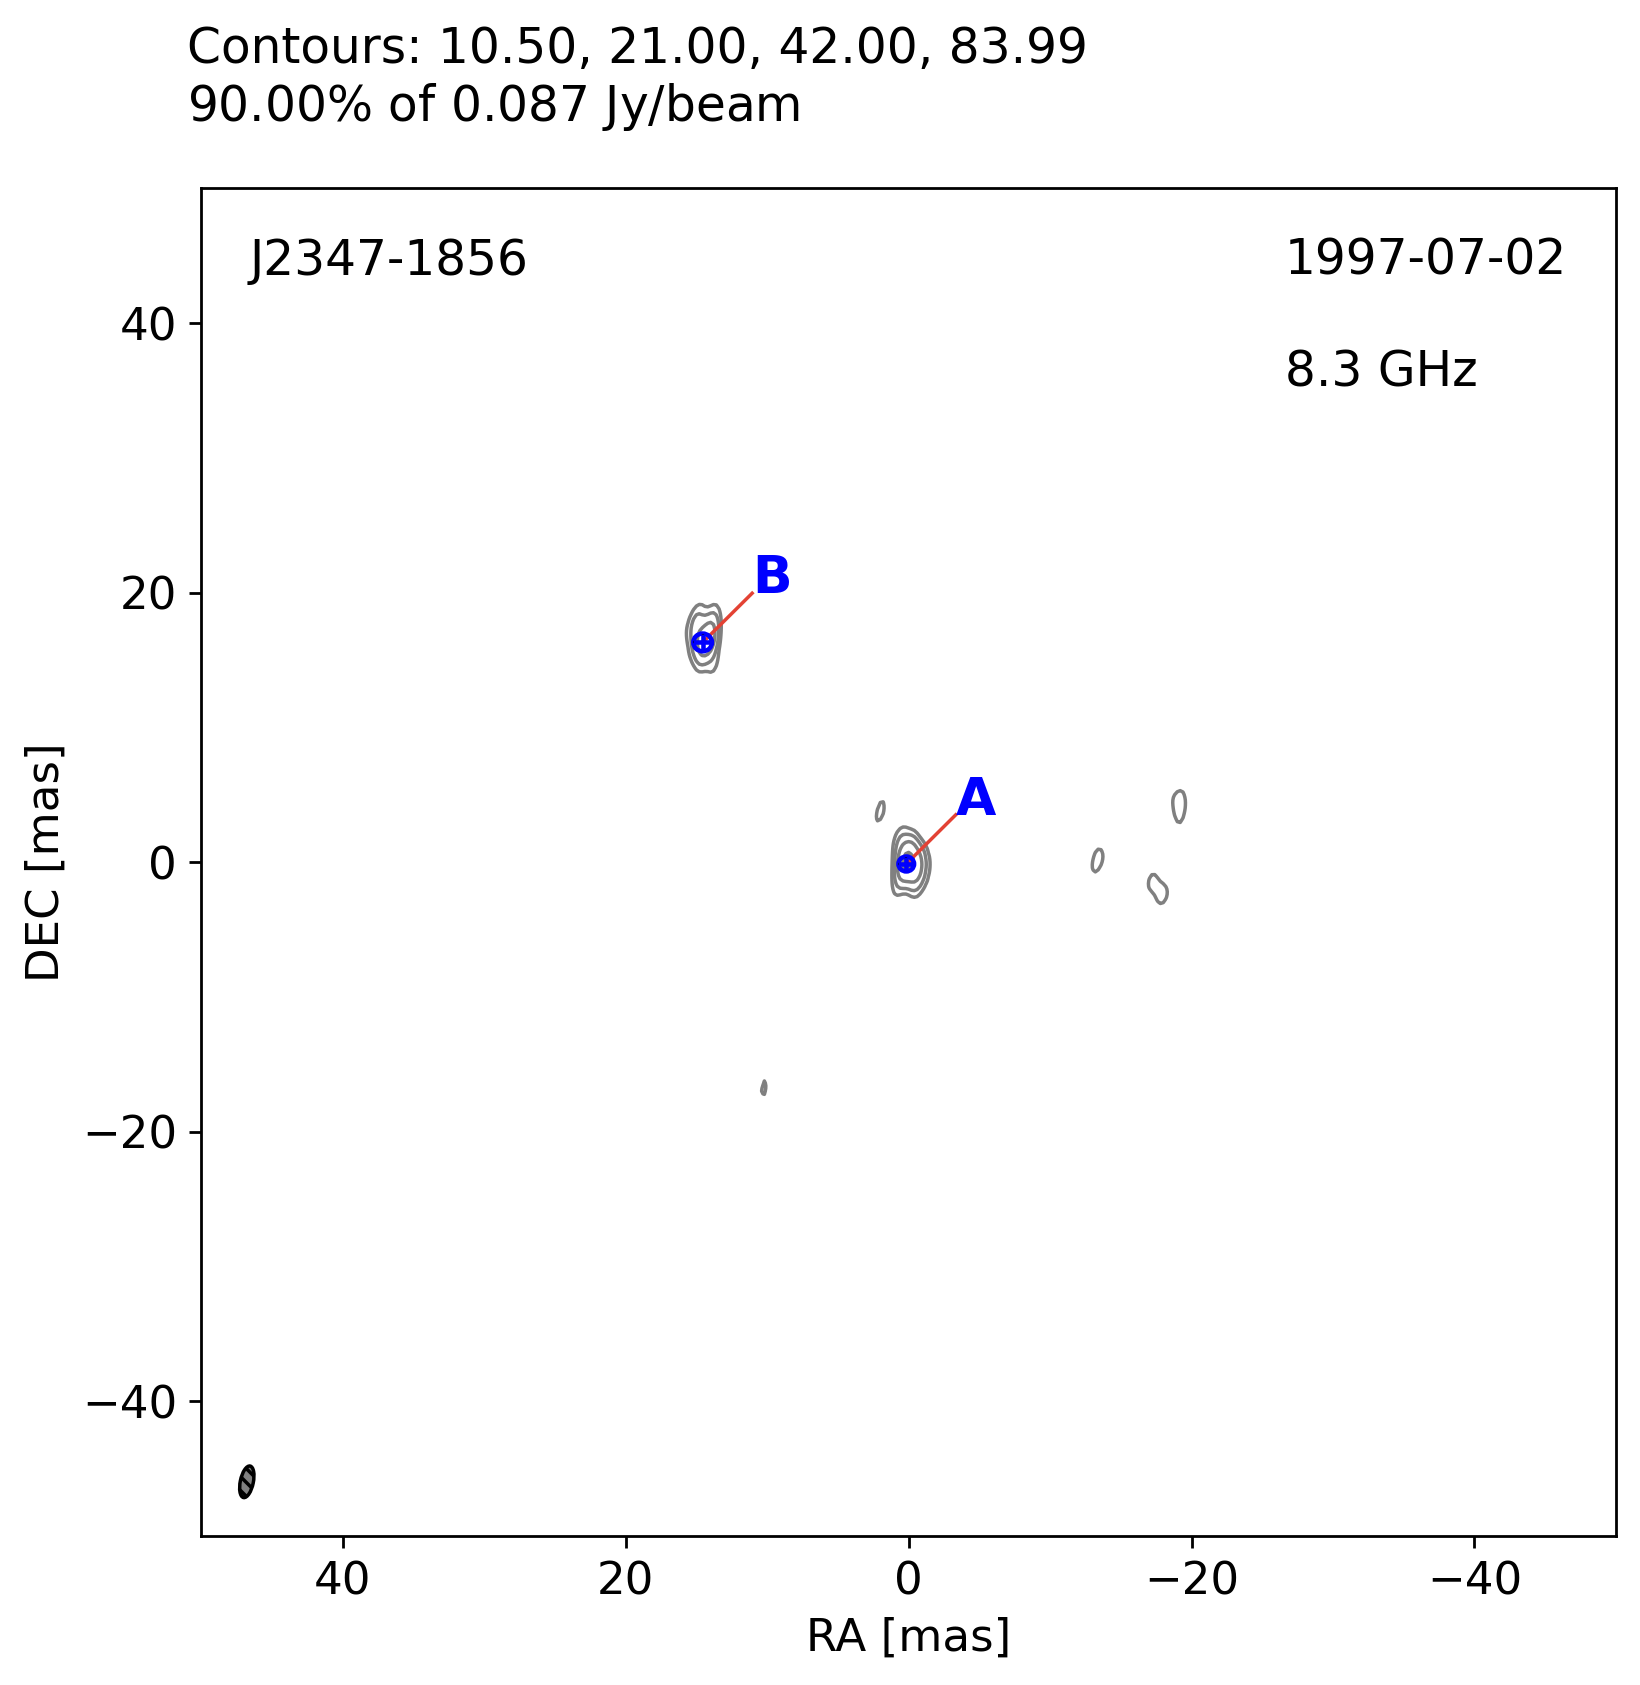

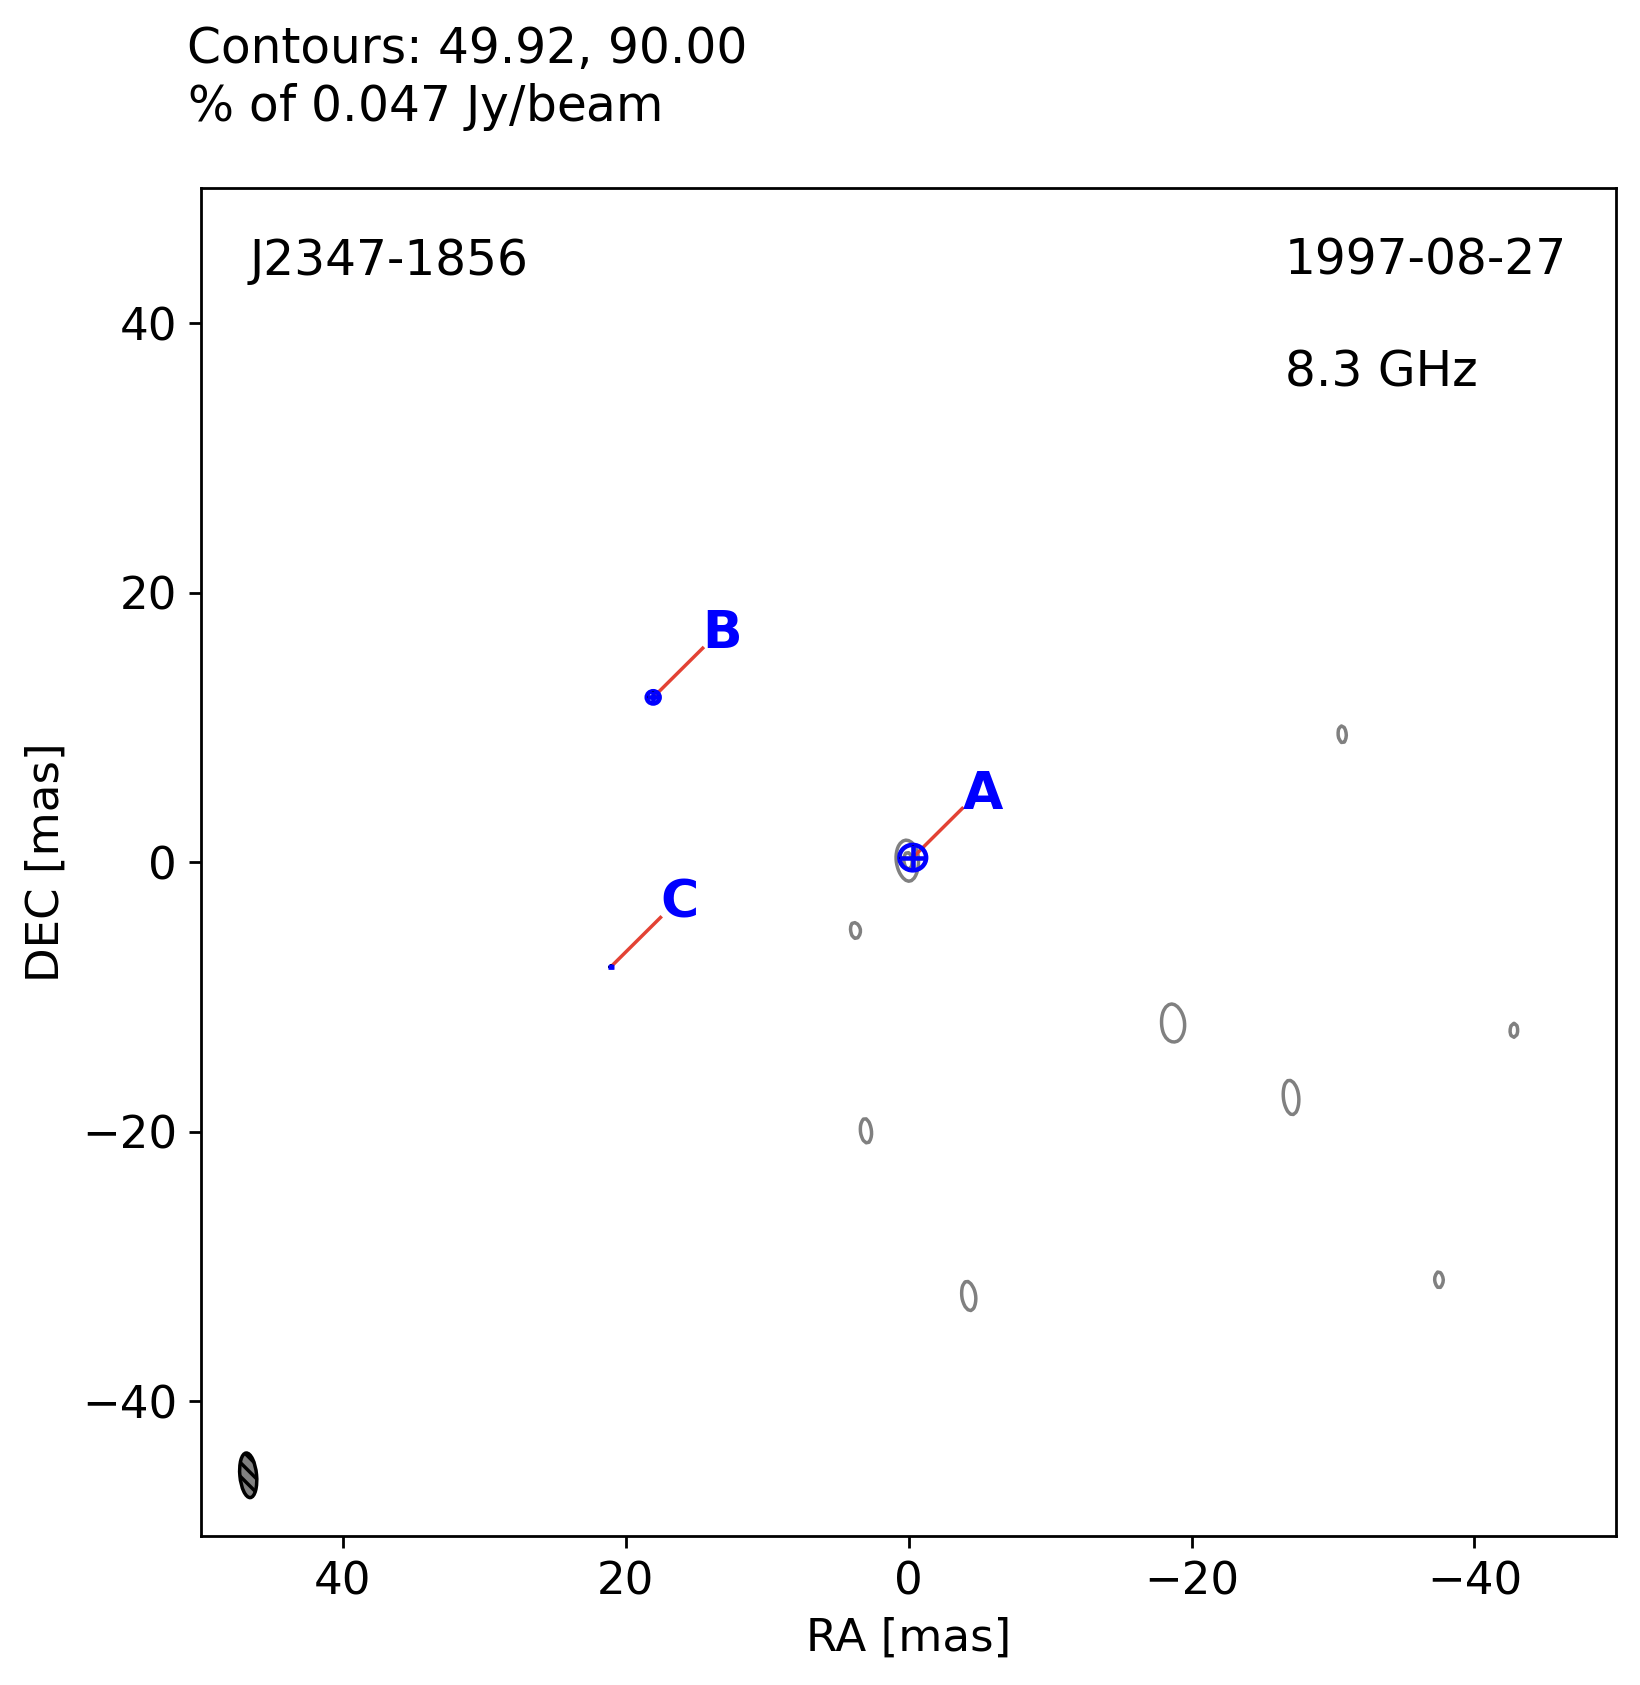

In [6]:
# Hmm, the 1997 epoch looks suspiciously different. Let us check the images right here.

# We can also plot single images. For this we first print and check what datasets we have
J2347.print_image_datasets()
# Then we can access that dataset by index, or by a combination of epoch and frequency:
datasets = J2347.get_image_datasets(by_index=[1,2,6,7])    # always returns a list even for one returned dataset

J2347.plot_image(datasets[0], show=True, plt_xlim=[50,-50], plt_ylim=[-50,50])
J2347.plot_image(datasets[1], show=True, plt_xlim=[50,-50], plt_ylim=[-50,50])
J2347.plot_image(datasets[2], show=True, plt_xlim=[50,-50], plt_ylim=[-50,50])
J2347.plot_image(datasets[3], show=True, plt_xlim=[50,-50], plt_ylim=[-50,50])

## Check variability and additional functionality

In [7]:
# We can also check the maximum flux variability and if it exceeds a set threshold in any given epoch and frequency.
# This also creates csv summary files where we can check everything in detail
J2347.check_variability()

# This looks suspicously high in the early epochs.

### Check component variability ###
Total flux density maximum variability: 589.8 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz
! Total flux density varies by more than 20 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz: 589.8 %/yr
Component A flux density maximum variability: 642.2 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz
! Component A flux density varies by more than 20 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz: 642.2 %/yr
Component B flux density maximum variability: 518.8 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz
! Component B flux density varies by more than 20 %/yr between 1997-07-02 and 1997-08-27 at 2.3 GHz: 518.8 %/yr
Total flux density maximum variability: 2.4 %/yr between 1997-07-02 and 2014-06-09 at 2.3 GHz
Component A flux density maximum variability: 2.3 %/yr between 1997-07-02 and 2014-06-09 at 2.3 GHz
Component B flux density maximum variability: 2.4 %/yr between 1997-07-02 and 2014-06-09 at 2.3 GHz
Total flux density maximum variability: 

Currently loaded datasets (epoch, freq):
0 2021-03-04 4926490000.0
1 2014-06-09 2291875000.0
2 2017-05-01 2252000000.0
3 2018-04-08 2252000000.0
4 2014-06-09 8667875000.0
5 2017-05-01 8652000000.0
6 2018-04-08 8652000000.0
7 2022-03-22 4867750000.0
8 2022-03-22 8496000000.0


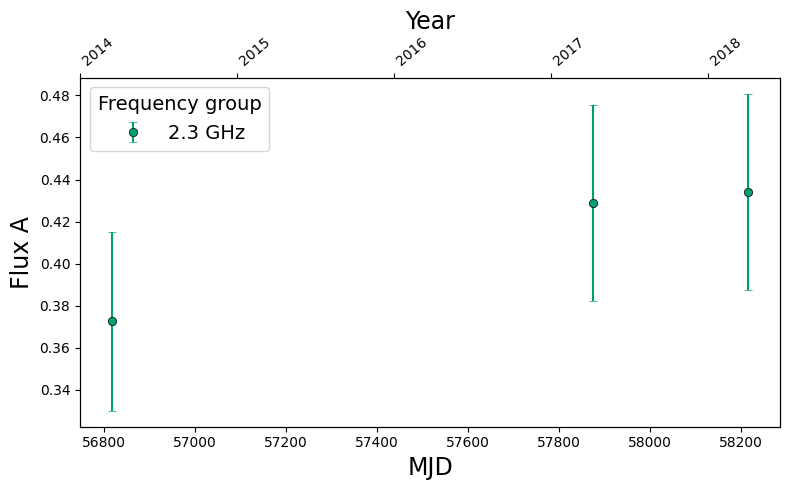

Saved: ./J2347-1856//2.3GHz_Flux_A.pdf


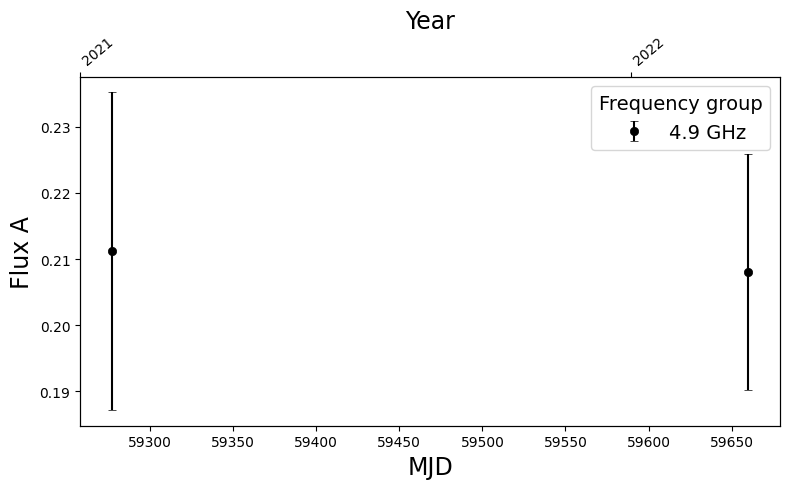

Saved: ./J2347-1856//4.9GHz_Flux_A.pdf


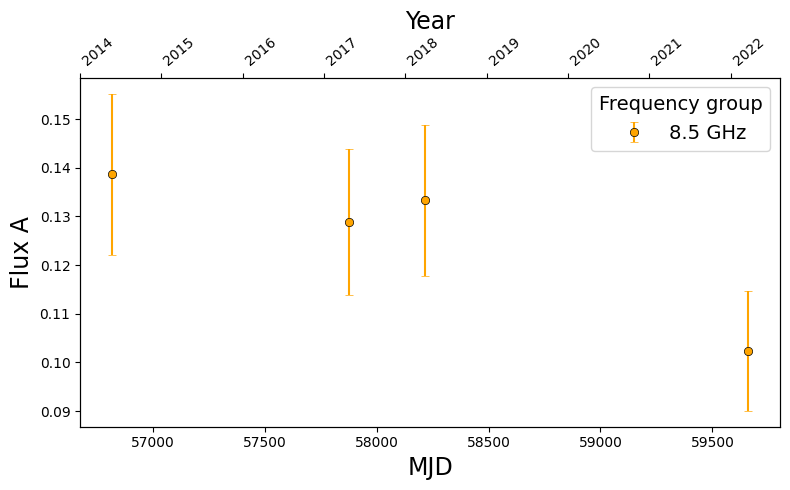

Saved: ./J2347-1856//8.5GHz_Flux_A.pdf


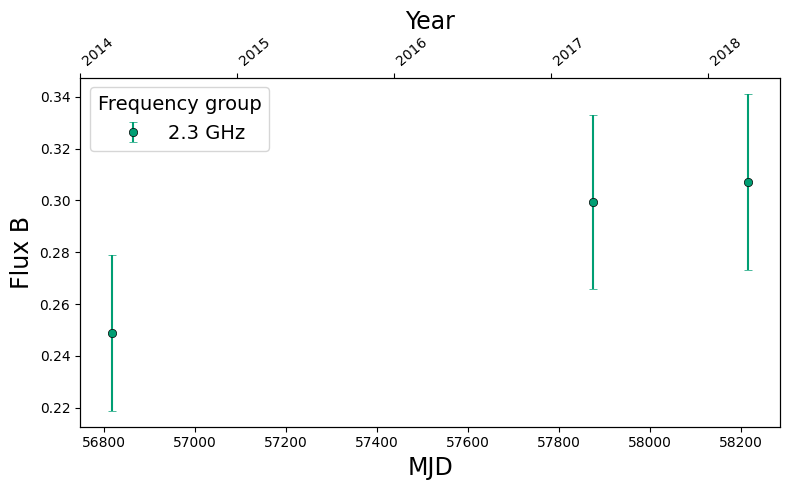

Saved: ./J2347-1856//2.3GHz_Flux_B.pdf


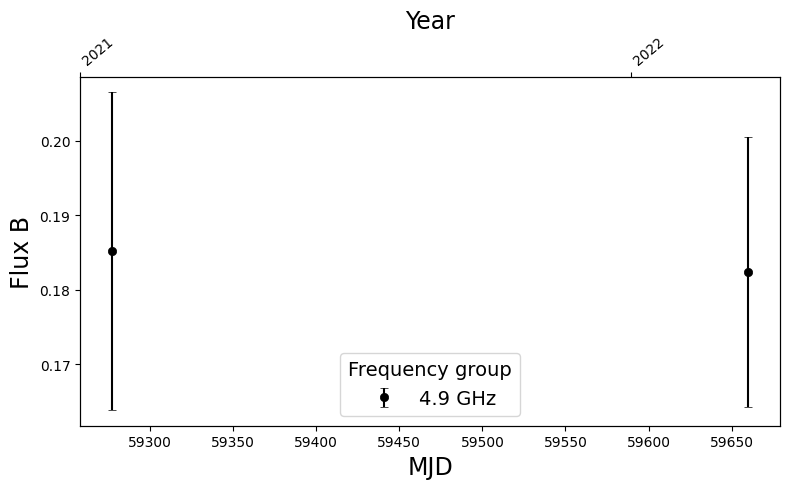

Saved: ./J2347-1856//4.9GHz_Flux_B.pdf


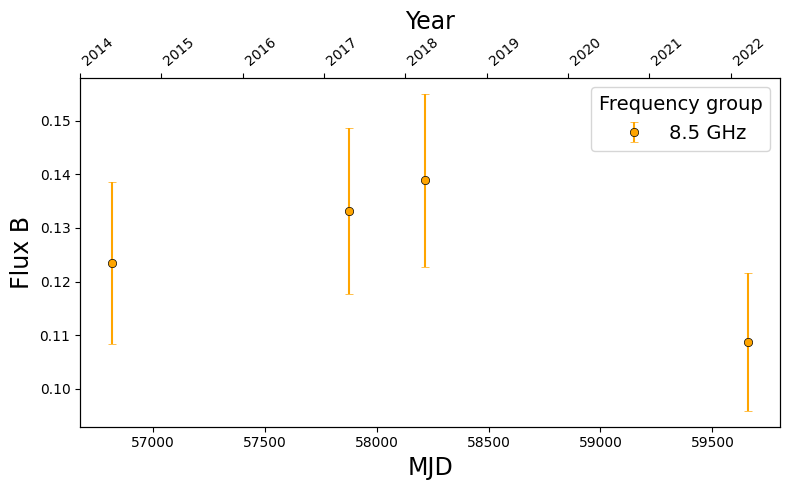

Saved: ./J2347-1856//8.5GHz_Flux_B.pdf


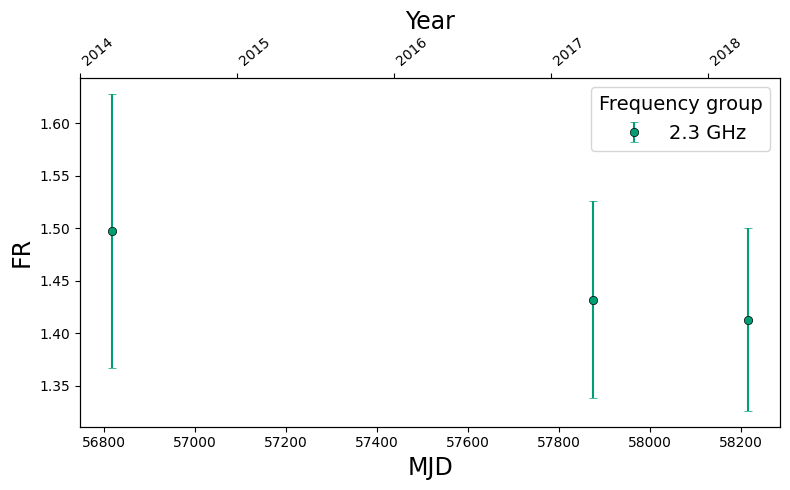

Saved: ./J2347-1856//2.3GHz_FR.pdf


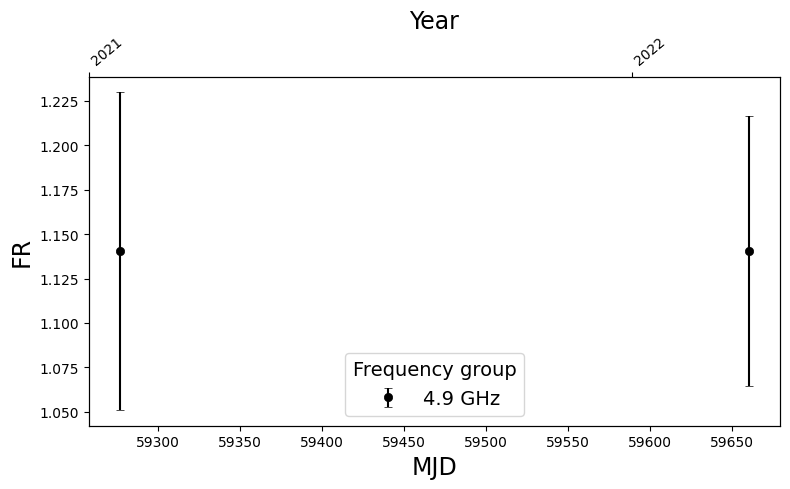

Saved: ./J2347-1856//4.9GHz_FR.pdf


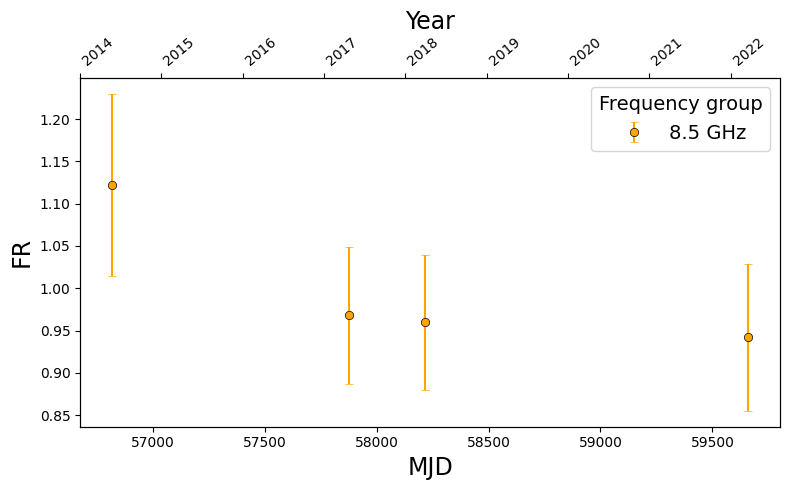

Saved: ./J2347-1856//8.5GHz_FR.pdf


# Plotting all data for FR #


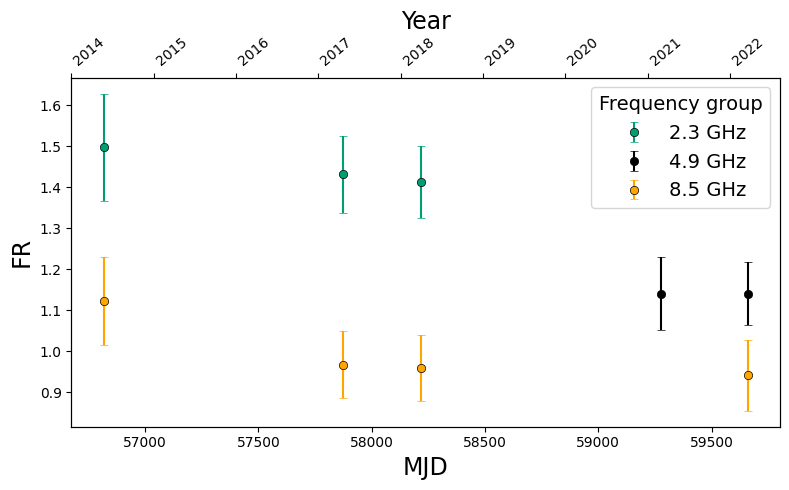

Saved combined FR plot: ./J2347-1856//all_freqs_FR.pdf


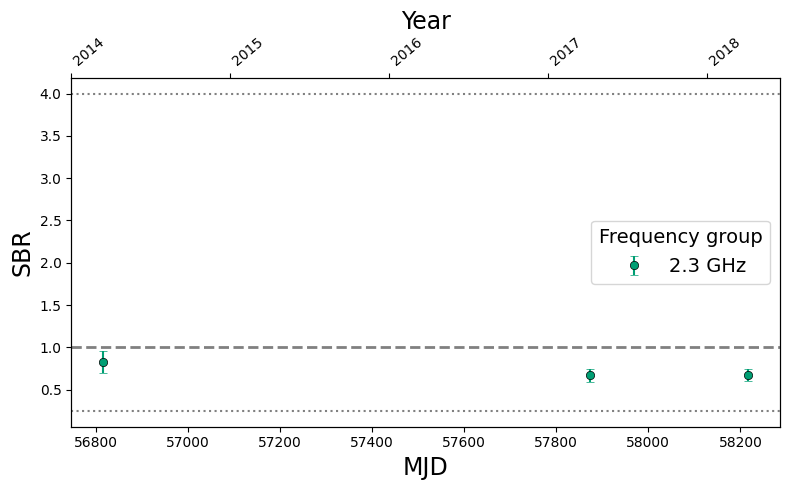

Saved: ./J2347-1856//2.3GHz_SBR.pdf


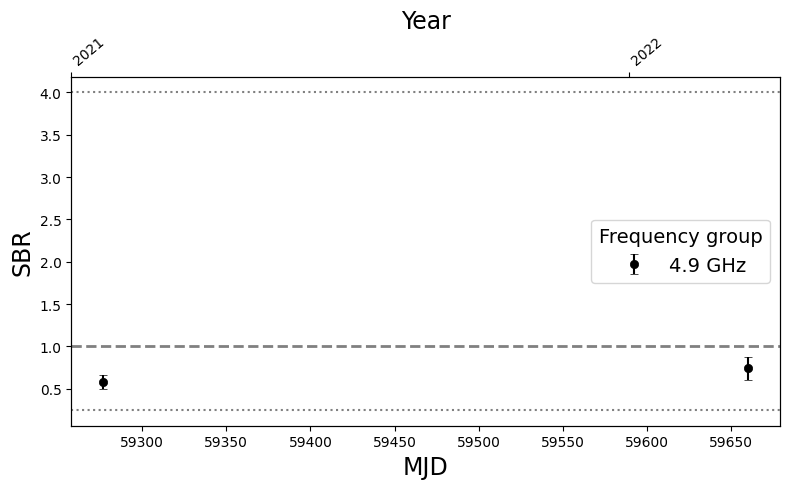

Saved: ./J2347-1856//4.9GHz_SBR.pdf


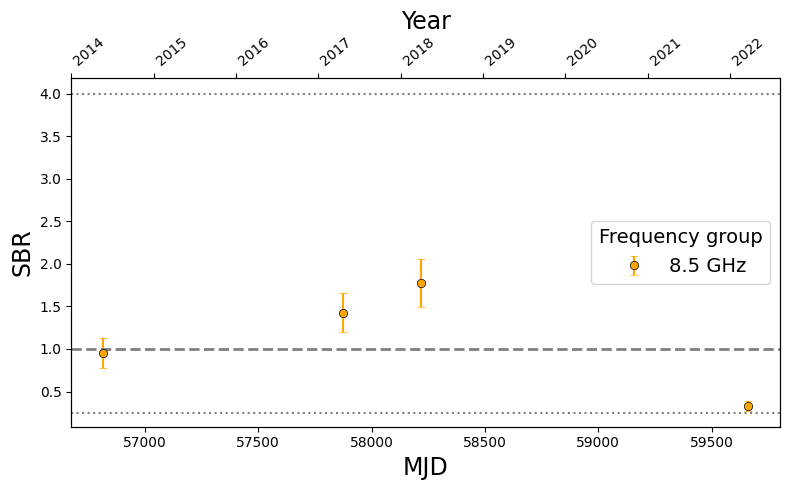

Saved: ./J2347-1856//8.5GHz_SBR.pdf


# Plotting all data for SBR #


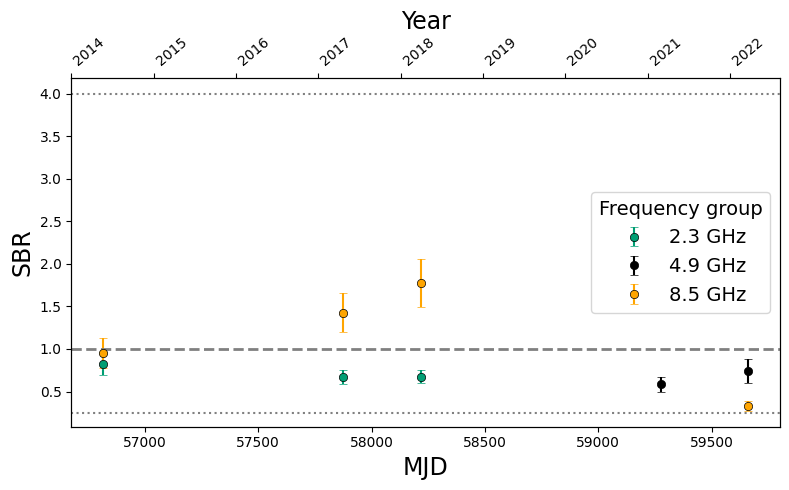

Saved combined SBR plot: ./J2347-1856//all_freqs_SBR.pdf


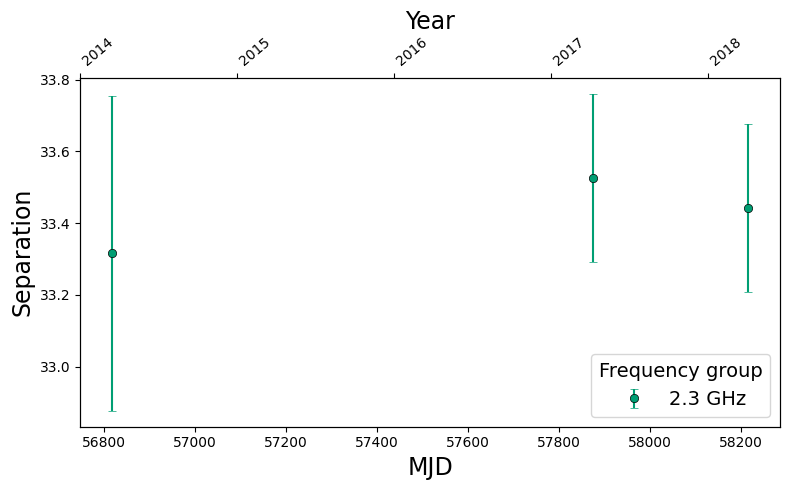

Saved: ./J2347-1856//2.3GHz_Separation.pdf


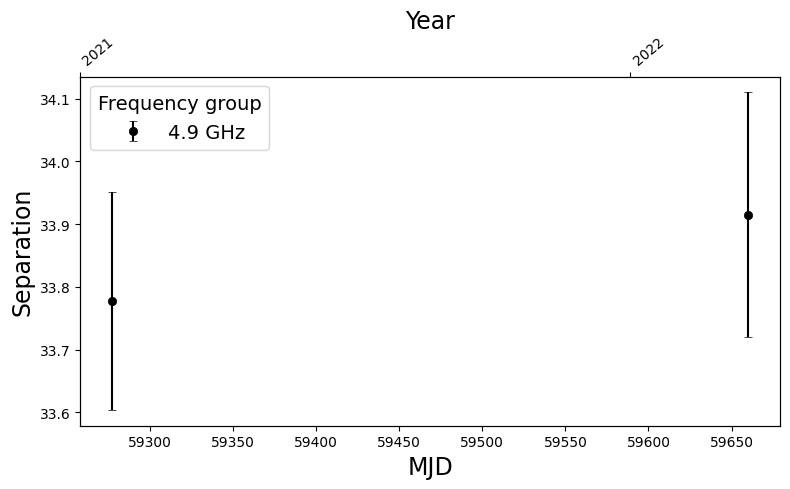

Saved: ./J2347-1856//4.9GHz_Separation.pdf


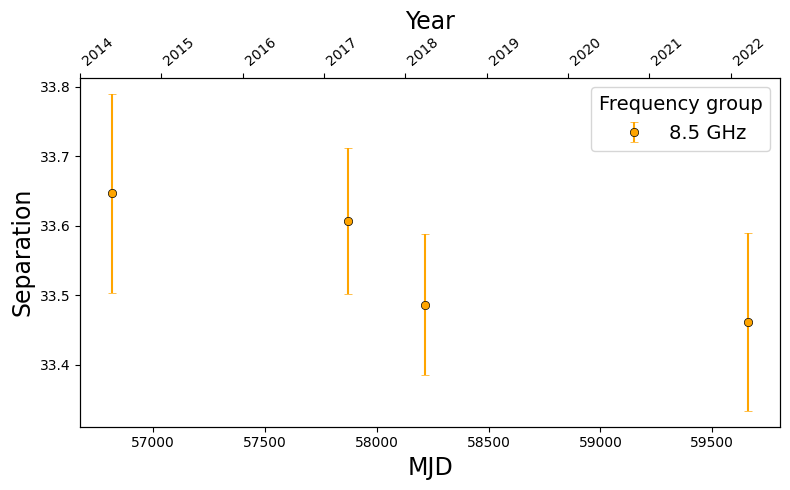

Saved: ./J2347-1856//8.5GHz_Separation.pdf


In [8]:
# The image looks OK. Let us remove these epochs and frequencies from the lens_candidate object for now
J2347.remove_image_dataset(by_index=[1,2,6,7])
J2347.print_image_datasets()

# We plot again the relevant quantities
J2347.plot_fluxes_all(show=True)
J2347.plot_FR_all(show=True)
J2347.plot_SBR_all(show=True)
J2347.plot_separation_all(show=True)

In [9]:
import pandas as pd

# Check the variability again
J2347.check_variability()
# And check out the overall values across epochs and frequencies
df_var = pd.read_csv('./J2347-1856/variability_8.3GHz.csv')
print(df_var.columns)
print(df_var)

### Check component variability ###
Total flux density maximum variability: 7.2 %/yr between 2014-06-09 and 2017-05-01 at 2.3 GHz
Component A flux density maximum variability: 6.3 %/yr between 2014-06-09 and 2017-05-01 at 2.3 GHz
Component B flux density maximum variability: 8.6 %/yr between 2014-06-09 and 2017-05-01 at 2.3 GHz
Total flux density maximum variability: 6.1 %/yr between 2014-06-09 and 2018-04-08 at 2.3 GHz
Component A flux density maximum variability: 5.3 %/yr between 2014-06-09 and 2018-04-08 at 2.3 GHz
Component B flux density maximum variability: 7.5 %/yr between 2014-06-09 and 2018-04-08 at 2.3 GHz
Total flux density maximum variability: 2.4 %/yr between 2017-05-01 and 2018-04-08 at 2.3 GHz
Component A flux density maximum variability: 1.7 %/yr between 2017-05-01 and 2018-04-08 at 2.3 GHz
Component B flux density maximum variability: 3.4 %/yr between 2017-05-01 and 2018-04-08 at 2.3 GHz
Saved variability results to ./J2347-1856/variability_2.3GHz.csv
Total flux densit

## Evaluate data

In [10]:
# We can direclty evaluate all relevant criteria or one at a time
J2347.evaluate_FR(FR_sigmas=2)    # default is FR_thresh=2 (number of sigmas)
J2347.evaluate_SBR(SBR_thresh=7)    # default is SBR_thresh=4
J2347.evaluate_separation(sep_sigmas=3)    # default is sep_thresh=2
J2347.evaluate_spectra(spix_diff_max=0.3)    # default is spix_thresh=0.5 (number of sigmas)

# this prints any deviations from the lens expectations, and saves them in the df.
# We can print again the results from the check
print(J2347.df[['Epoch','Freq [Hz]','FR OK?']])
print(J2347.df[['Epoch','Freq [Hz]','SBR OK?']])
print(J2347.df[['Epoch','Freq [Hz]','Sep. OK?']])
print(J2347.df[['Epoch','Freq [Hz]','alpha OK?']])

# We can also run (this time with default parameters)
J2347.evaluate_all(export_csv=True)
# We can also specify the directory we want to save to (file name is automatic)
J2347.evaluate_all(export_csv=True, outfile_path='Test')
# It also exports the updated df as csv if export_csv==True
print(J2347.df[['Epoch','Freq [Hz]','FR OK?']])
print(J2347.df[['Epoch','Freq [Hz]','SBR OK?']])
print(J2347.df[['Epoch','Freq [Hz]','Sep. OK?']])
print(J2347.df[['Epoch','Freq [Hz]','alpha OK?']])

# Let us also export the results as a ready-to compile .tex file
J2347.export_latex()

### Evaluate separation criterion ###
### Evaluating SBR criterion ###
### Evaluate separation criterion ###
### Evaluating spectral criterion ###
! Spectral criterion violated for dataset from 2017-05-01 at 8.7 GHz
         Epoch     Freq [Hz] FR OK?
4   2014-06-09  2.291875e+09    YES
5   2014-06-09  8.667875e+09    YES
6   2017-05-01  2.252000e+09    YES
7   2017-05-01  8.652000e+09    YES
8   2018-04-08  2.252000e+09    YES
9   2018-04-08  8.652000e+09    YES
10  2021-03-04  4.926490e+09    YES
11  2022-03-22  4.867750e+09    YES
12  2022-03-22  8.496000e+09    YES
         Epoch     Freq [Hz] SBR OK?
4   2014-06-09  2.291875e+09     YES
5   2014-06-09  8.667875e+09     YES
6   2017-05-01  2.252000e+09     YES
7   2017-05-01  8.652000e+09     YES
8   2018-04-08  2.252000e+09     YES
9   2018-04-08  8.652000e+09     YES
10  2021-03-04  4.926490e+09     YES
11  2022-03-22  4.867750e+09     YES
12  2022-03-22  8.496000e+09     YES
         Epoch     Freq [Hz] Sep. OK?
4   2014-06-09  

/home/felix/Python_modules/SMILE/Lens_candidate/lens_candidate.py:970: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["alpha OK?"][i] = 'NO'
/home/felix/Python_modules/SMILE/Lens_candidate/lens_candidate.py:1270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Freq [Hz]"][i] = freq/1E9
/home/felix/Python_modules/SMILE/Lens_candidate/lens_candidate.py:1273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Flux [Jy]"][i] = df["